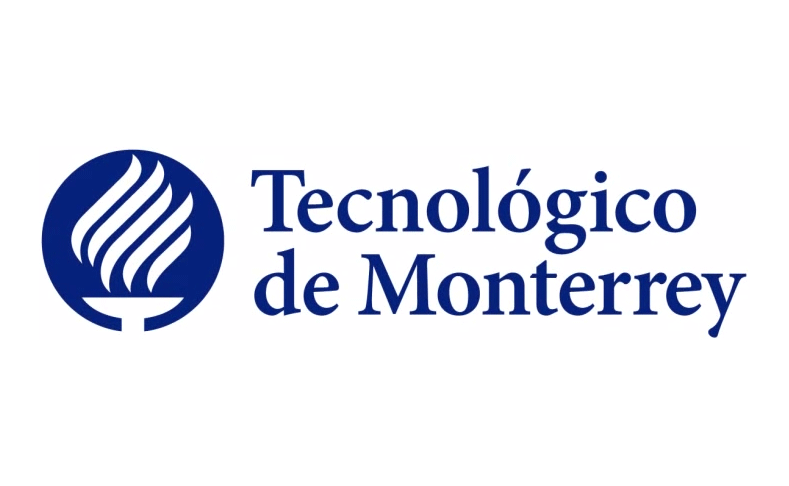

#**Maestría en Inteligencia Artificial Aplicada**

##**Materia:** Proyecto Integrador

**Profesor titular:** Dra. Grettel Barceló Alonso / Dr. Luis Eduardo Falcón Morales

**ASESOR - PROYECTO INTEGRADOR ABR25**  
Dr. Carlos Villaseño

<br><br>
**Equipo 10**  
David García Robles - A01152606  
David Nava Jiménez - A01168501  
José Antonio Hernández Hernández - A01381334  


#**Carga de librerías y visualización inicial del DataFrame**

In [264]:
#from google.colab import drive
#drive.mount('/content/drive')

In [265]:
!pip install category_encoders


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.decomposition import PCA
import re

In [267]:
df = pd.read_csv('C:/Maestría Inteligencia artificial aplicada/Trimestre 7 (Proyecto integrador y TD)/ventas.csv', encoding='iso-8859-1', low_memory=False)

In [268]:
df.head(5)

,SUCURSAL,ESTADO_SUCURSAL,CLAVE_OPERACION,OPERACION,PARTIDA,ORIGEN,DESCRIPCION_PARTIDA,GRAMAJE,KILATAJE,AVALUO_COMPLEMENTARIO,...,IVACOM_PASECOM,COM_EXHIBICION,IVACOM_EXHIBICION,INTERES_DEPRECUP,IVAINT_DEPRECUP,FECHA_MAX_DEP_RECUP,FECHA_CARGA,num_particion,imp_minusvalia,imp_cancelacion_int
0,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181615421,SIVA,176231504-1 ANILLO TIPO:DAMA DISEÃO:CABUJON D...,4,14,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
1,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181616741,MIDAS,174275433-1 ANILLO ORO AMARILLO 14K PESO 1.60 ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
2,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181616743,MIDAS,173896016-1 MEDIA CHURUMBELA ORO AMARILLO 14K...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
3,16,AGUASCALIENTES,VP,Venta al Publico,181662772,SIVA,1 COLLAR TIPO:ROSARIO DISEÃO:ESFERAS LISAS D...,23.9,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
4,278,CIUDAD DE MÃXICO,VP,Venta al Publico,181809632,SIVA,1 ACCESORIOS TIPO:LLAVERO DISEÃO:GRABADO DE O...,12.4,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN


In [269]:
#Imprimir número de columnas y número de filas del dataframe
print('Número de filas:', df.shape[0])
print('Número de columnas:', df.shape[1])

Número de filas: 1048575
Número de columnas: 64


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 64 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SUCURSAL                   1048533 non-null  object 
 1   ESTADO_SUCURSAL            1048538 non-null  object 
 2   CLAVE_OPERACION            1048516 non-null  object 
 3   OPERACION                  1048511 non-null  object 
 4   PARTIDA                    1048516 non-null  object 
 5   ORIGEN                     1048516 non-null  object 
 6   DESCRIPCION_PARTIDA        1048436 non-null  object 
 7   GRAMAJE                    941340 non-null   object 
 8   KILATAJE                   866459 non-null   object 
 9   AVALUO_COMPLEMENTARIO      915717 non-null   object 
 10  FACTOR_HECHURA             941352 non-null   object 
 11  FACTOR                     941343 non-null   object 
 12  VALOR_MONTE                1048243 non-null  object 
 13  VALOR_MONTE_

In [271]:
df_relojes = df[df['RAMO']== "Relojes"]
df_relojes

,SUCURSAL,ESTADO_SUCURSAL,CLAVE_OPERACION,OPERACION,PARTIDA,ORIGEN,DESCRIPCION_PARTIDA,GRAMAJE,KILATAJE,AVALUO_COMPLEMENTARIO,...,IVACOM_PASECOM,COM_EXHIBICION,IVACOM_EXHIBICION,INTERES_DEPRECUP,IVAINT_DEPRECUP,FECHA_MAX_DEP_RECUP,FECHA_CARGA,num_particion,imp_minusvalia,imp_cancelacion_int
64,1006,CIUDAD DE MÃXICO,VP,Venta al Publico,153655701,MIDAS,RELOJ PARA DAMA GIRARD PERREGUAX CUERDA MANUAL...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
65,324,NUEVO LEÃN,VP,Venta al Publico,154965702,MIDAS,RELOJ PARA CABALLERO TAG HEUER AUT CALIB 4.97 ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
67,277,TAMAULIPAS,VP,Venta al Publico,160096153,MIDAS,RELOJ PARA DAMA FOSSIL QZO CARATULA BLANCA CAJ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
72,81,ESTADO DE MÃXICO,VP,Venta al Publico,161886155,MIDAS,RELOJ PARA DAMA MIDO QZO CARAT NEGRA CAJA Y PU...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
73,324,NUEVO LEÃN,VP,Venta al Publico,162159418,MIDAS,RELOJ PARA DAMA OMEGA CONSTELLATION CARATULA ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048268,44,ZACATECAS,VP,Venta al Publico,167668597,MIDAS,RELOJ PARA DAMA CITIZEN CUARZO CARATULA PLATEA...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-18T05:01:14.697Z,202408.0,NaN,NaN
1048378,1,CIUDAD DE MÃXICO,VP,Venta al Publico,172536205,MIDAS,RELOJ DE BOLSILLO SABONETA JFS BANTTESF MOV CU...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,05/07/2024,2024-08-18T05:01:14.697Z,202408.0,NaN,NaN
1048429,296,CAMPECHE,VP,Venta al Publico,173392377,MIDAS,RELOJITO DE PULSERA PARA DAMA GENEVE DE CURAZO...,NaN,NaN,NaN,...,NaN,1212.365,NaN,NaN,NaN,NaN,2024-08-18T05:01:14.697Z,202408.0,NaN,NaN
1048495,316,CIUDAD DE MÃXICO,VP,Venta al Publico,174638163,MIDAS,RELOJ TUDOR- PARA CABALLERO LÃNEA BLACK BAY- ...,NaN,NaN,NaN,...,NaN,388.2905,NaN,NaN,NaN,11/06/2024,2024-08-18T05:01:14.697Z,202408.0,NaN,NaN


In [272]:
sample_df = df_relojes.sample(10000, random_state=27)                                    # Muestra aleatoria de 100,000 registros

<Axes: xlabel='CLAVE_OPERACION', ylabel='Count'>

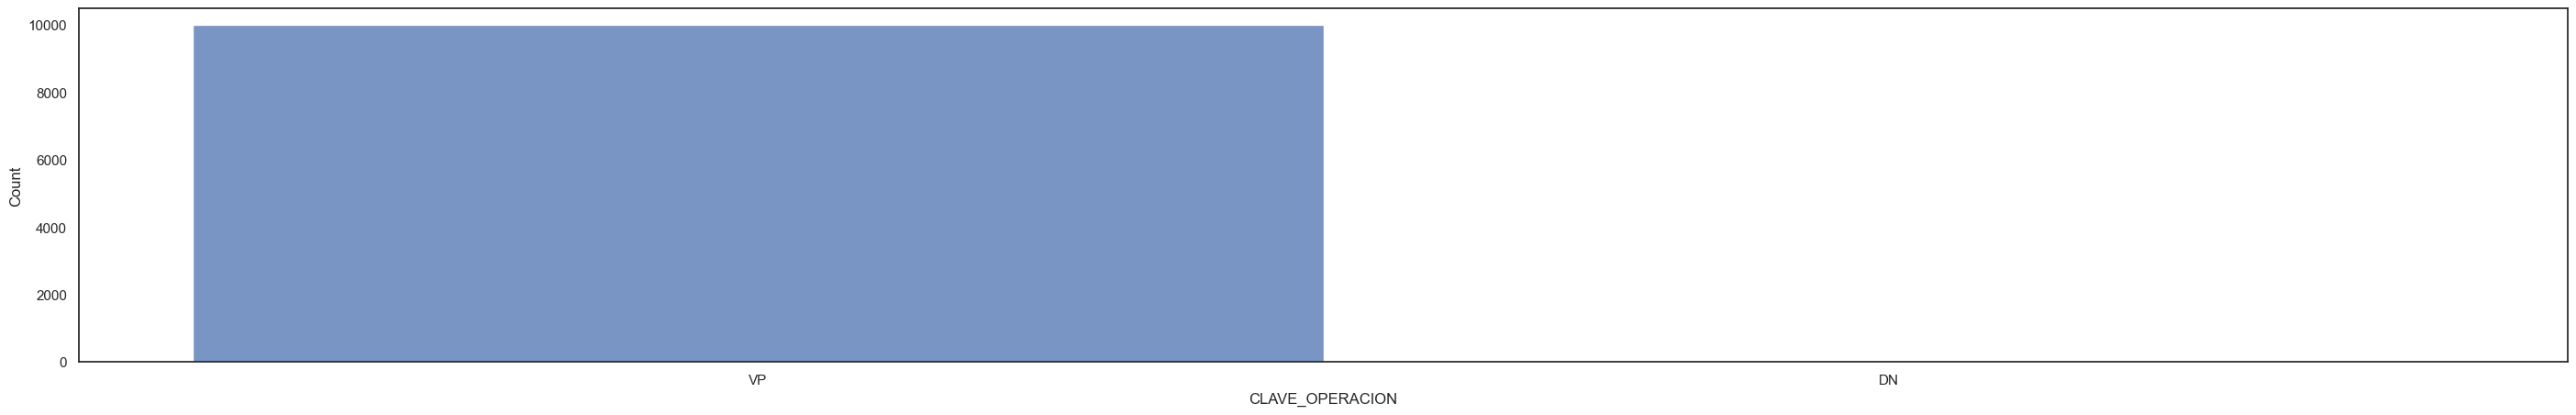

In [273]:
sns.histplot(sample_df['CLAVE_OPERACION'])

In [274]:
df_relojes['CLAVE_OPERACION'].value_counts()

CLAVE_OPERACION
VP    52616
DN      116
Name: count, dtype: int64

<Axes: xlabel='OPERACION', ylabel='Count'>

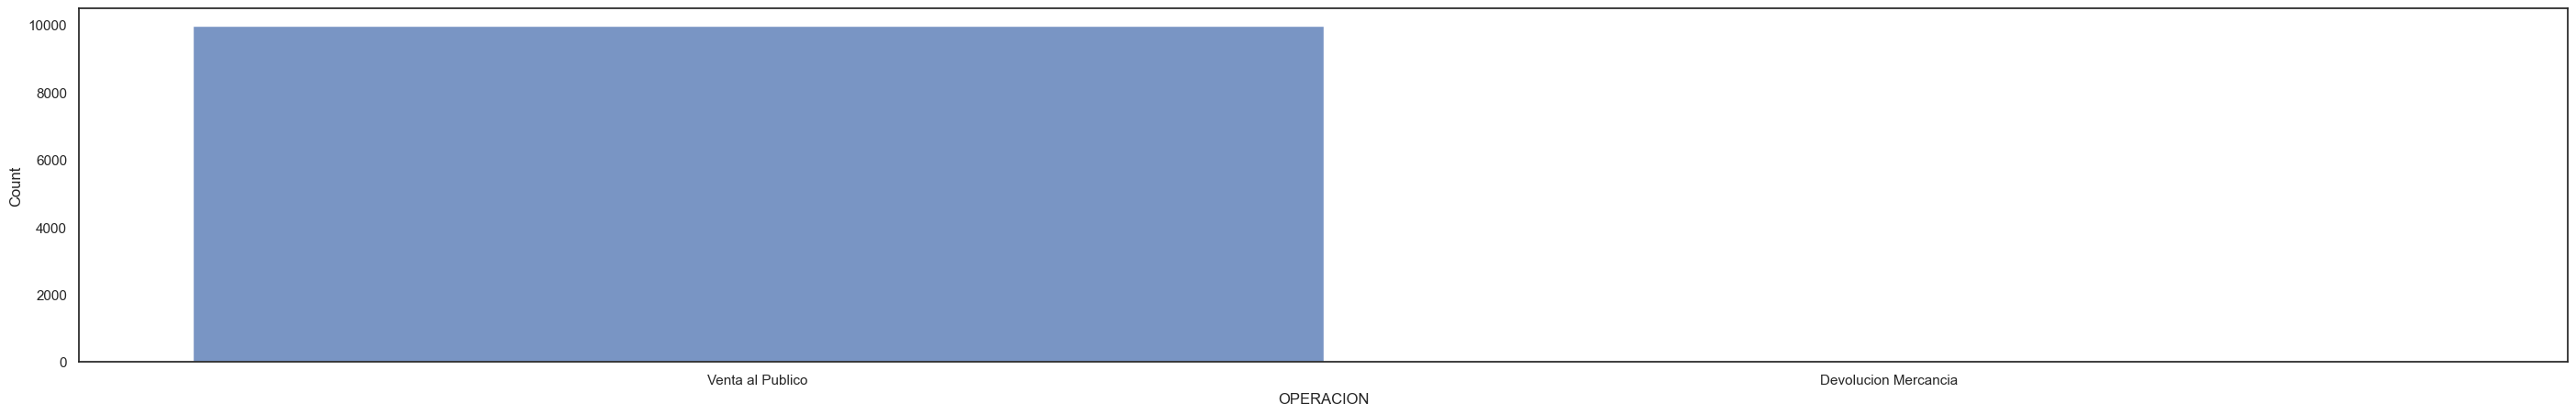

In [275]:
sns.histplot(sample_df['OPERACION'])

In [276]:
df_relojes['OPERACION'].value_counts()

OPERACION
Venta al Publico        52616
Devolucion Mercancia      116
Name: count, dtype: int64

Las columnas CLAVE_OPERACION y OPERACION presentan una cardinalidad muy baja, por lo que se deciden retirar del análisis

**Interpretaciones**

Revisando a detalle los datos, identificamos que hay columnas que no contienen información, es redundante o no aporta valor agregado al análisis de acuerdo con el negocio, estas son las siguientes: PARTIDA, FACTOR_HECHURA, AVALUO_COMPLEMENTARIO, GASTOSOPERACION, IVAINTERESDEPOSITO, IVAINTERESALMONEDA, IVAGASTOSOPERACION, IVA_DESEXT, FECHA_EMPENO_OK, FECHA_HORA_MOV_OK, FECHA_COMERCIALIZACION_OK, CUSTODIA, COM_ALMACENAJE, IVACOM_ALMACENAJE, COMPASE_COMERCIALIZACION, IVACOM_PASECOM, IVACOM_EXHIBICION, INTERES_DEPRECUP, IVAINT_DEPRECUP, imp_minusvalia, imp_cancelacion_int, CLAVE_OPERACION, OPERACION y RANGO_DIAS_ALMONEDA (redundante con nuestra variable objetivo). Las cuales vamos a eliminar del dataset con la función drop de pandas

In [277]:
df_relojes['AVALUO_COMPLEMENTARIO'].value_counts()

Series([], Name: count, dtype: int64)

In [278]:
df_relojes['PARTIDA'].value_counts()

PARTIDA
183626035    4
176233893    3
178509252    3
175959867    3
181793188    3
            ..
181222375    1
181239809    1
181243951    1
181247281    1
174880651    1
Name: count, Length: 51835, dtype: int64

In [279]:
df_relojes['FACTOR_HECHURA'].value_counts()

Series([], Name: count, dtype: int64)

In [280]:
df_relojes.drop(['AVALUO_COMPLEMENTARIO', 'PARTIDA','FACTOR_HECHURA','GASTOSOPERACION', 'IVAINTERESDEPOSITO', 'IVAINTERESALMONEDA', 'IVAGASTOSOPERACION', 'IVA_DESEXT',
              'FECHA_EMPENO_OK', 'FECHA_HORA_MOV_OK', 'FECHA_COMERCIALIZACION_OK', 'CUSTODIA', 'COM_ALMACENAJE',
              'IVACOM_ALMACENAJE', 'COMPASE_COMERCIALIZACION', 'IVACOM_PASECOM', 'IVACOM_EXHIBICION',
              'INTERES_DEPRECUP', 'IVAINT_DEPRECUP', 'imp_minusvalia', 'imp_cancelacion_int','CLAVE_OPERACION','OPERACION','RANGO_DIAS_ALMONEDA'], axis=1,inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_8980\2655573127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relojes.drop(['AVALUO_COMPLEMENTARIO', 'PARTIDA','FACTOR_HECHURA','GASTOSOPERACION', 'IVAINTERESDEPOSITO', 'IVAINTERESALMONEDA', 'IVAGASTOSOPERACION', 'IVA_DESEXT',


In [281]:
df_relojes.head(5)

,SUCURSAL,ESTADO_SUCURSAL,ORIGEN,DESCRIPCION_PARTIDA,GRAMAJE,KILATAJE,FACTOR,VALOR_MONTE,VALOR_MONTE_ACTUALIZADO,AVALUO_COMERCIAL,...,CANAL,DIAS_ALMONEDA,PRECIO_VENTA_FINAL_SID,TIPO_PRENDA,FCH_CARGA,SALDO_INSOLUTO,COM_EXHIBICION,FECHA_MAX_DEP_RECUP,FECHA_CARGA,num_particion
64,1006,CIUDAD DE MÃXICO,MIDAS,RELOJ PARA DAMA GIRARD PERREGUAX CUERDA MANUAL...,NaN,NaN,NaN,17621.71,NaN,NaN,...,Cumplido,783,17155,reloj,03/05/2024,16741.4,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0
65,324,NUEVO LEÃN,MIDAS,RELOJ PARA CABALLERO TAG HEUER AUT CALIB 4.97 ...,NaN,NaN,NaN,6110,NaN,NaN,...,Cumplido,1185,2350,reloj,03/05/2024,4686.37,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0
67,277,TAMAULIPAS,MIDAS,RELOJ PARA DAMA FOSSIL QZO CARATULA BLANCA CAJ...,NaN,NaN,NaN,423,NaN,NaN,...,Cumplido,941,225.6,reloj,03/05/2024,282,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0
72,81,ESTADO DE MÃXICO,MIDAS,RELOJ PARA DAMA MIDO QZO CARAT NEGRA CAJA Y PU...,NaN,NaN,NaN,1222,NaN,NaN,...,Cumplido,862,478.93,reloj,03/05/2024,598.78,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0
73,324,NUEVO LEÃN,MIDAS,RELOJ PARA DAMA OMEGA CONSTELLATION CARATULA ...,NaN,NaN,NaN,7520,NaN,NaN,...,Cumplido,849,940,reloj,03/05/2024,4271.36,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0


In [282]:
print('Número de filas:', df_relojes.shape[0])                                             #Imprimir número de columnas y número de filas del dataframe posterior a esta primer limpieza
print('Número de columnas:', df_relojes.shape[1])

Número de filas: 52732
Número de columnas: 40


Adicional, encontramos instancias que no tienen valores (NaN) dentro del dataset, por lo que también eliminamos las instancias que tienen al menos 10 valores no nulos

In [283]:
df_relojes = df_relojes.dropna(thresh=10)                                                          # Mantiene filas con al menos 10 valores no nulos


In [284]:
print('Número de filas:', df_relojes.shape[0])                                            #Imprimir número de columnas y número de filas del dataframe posterior a esta primer limpieza
print('Número de columnas:', df_relojes.shape[1])

Número de filas: 52732
Número de columnas: 40


#**Valores Faltantes**

In [285]:
df_relojes.isnull().sum()*100/len(df)

SUCURSAL                    0.000000
ESTADO_SUCURSAL             0.000000
ORIGEN                      0.000000
DESCRIPCION_PARTIDA         0.000000
GRAMAJE                     5.028920
KILATAJE                    5.028920
FACTOR                      5.028920
VALOR_MONTE                 0.000000
VALOR_MONTE_ACTUALIZADO     5.028825
AVALUO_COMERCIAL            5.028920
PRESTAMO                    0.000000
PRECIO_VENTA_INICIAL        0.000000
PRECIO_VENTA_FINAL          0.000000
FECHA_EMPENO                0.000000
FECHA_COMERCIALIZACION      0.000000
VALOR_ANCLA_ORO             5.028825
RAMO                        0.000000
SUBRAMO                     0.000000
REFRENDOS_REALIZADOS        0.000000
INCREMENTO                  5.028920
DESPLAZAMIENTO_COMERCIAL    5.028920
VALUADOR                    0.000000
FECHA_HORA_MOV              0.000000
DEMASIA                     0.000095
INTERES                     0.000000
INTERESALMONEDA             0.244618
DES_EXT                     0.244522
I

In [286]:
df_relojes.drop(['COM_EXHIBICION','FECHA_MAX_DEP_RECUP','num_particion'], axis=1,inplace=True)

In [287]:
                                                                                  #Imprimir número de columnas y número de filas del dataframe posterior a esta primer limpieza
print('Número de filas:', df_relojes.shape[0])
print('Número de columnas:', df_relojes.shape[1])

Número de filas: 52732
Número de columnas: 37


In [288]:
df_relojes.isnull().sum()*100/len(df)

SUCURSAL                    0.000000
ESTADO_SUCURSAL             0.000000
ORIGEN                      0.000000
DESCRIPCION_PARTIDA         0.000000
GRAMAJE                     5.028920
KILATAJE                    5.028920
FACTOR                      5.028920
VALOR_MONTE                 0.000000
VALOR_MONTE_ACTUALIZADO     5.028825
AVALUO_COMERCIAL            5.028920
PRESTAMO                    0.000000
PRECIO_VENTA_INICIAL        0.000000
PRECIO_VENTA_FINAL          0.000000
FECHA_EMPENO                0.000000
FECHA_COMERCIALIZACION      0.000000
VALOR_ANCLA_ORO             5.028825
RAMO                        0.000000
SUBRAMO                     0.000000
REFRENDOS_REALIZADOS        0.000000
INCREMENTO                  5.028920
DESPLAZAMIENTO_COMERCIAL    5.028920
VALUADOR                    0.000000
FECHA_HORA_MOV              0.000000
DEMASIA                     0.000095
INTERES                     0.000000
INTERESALMONEDA             0.244618
DES_EXT                     0.244522
I

Vamos a revisar ahora las columnas con el porcentaje de valores faltantes

In [289]:
per_miss_col = df_relojes.isna().mean() * 100
missing = pd.DataFrame(per_miss_col)
missing.columns = ['Percentage of missing values (%)']
missing

,Percentage of missing values (%)
SUCURSAL,0.000000
ESTADO_SUCURSAL,0.000000
ORIGEN,0.000000
DESCRIPCION_PARTIDA,0.000000
GRAMAJE,100.000000
KILATAJE,100.000000
FACTOR,100.000000
VALOR_MONTE,0.000000
VALOR_MONTE_ACTUALIZADO,99.998104
AVALUO_COMERCIAL,100.000000


Con base al análisis anterior, podemos observar que hay columnas que no presentan datos por el tipo de producto que estamos analizando que es "relojes", por lo que vamos a proceder a eliminarlas. Las columnas son GRAMAJE, KILATAJE, FACTOR, VALOR_MONTE_ACTUALIZADO, AVALUO_COMERCIAL, VALOR_ANCLA_ORO, INCREMENTO y DESPLAZAMIENTO_COMERCIAL

In [290]:
df_relojes.drop(['GRAMAJE','KILATAJE','FACTOR','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','VALOR_ANCLA_ORO','INCREMENTO','DESPLAZAMIENTO_COMERCIAL'], axis=1,inplace=True)

In [291]:
df_relojes.head()

,SUCURSAL,ESTADO_SUCURSAL,ORIGEN,DESCRIPCION_PARTIDA,VALOR_MONTE,PRESTAMO,PRECIO_VENTA_INICIAL,PRECIO_VENTA_FINAL,FECHA_EMPENO,FECHA_COMERCIALIZACION,...,IMPORTE_VENTA,PRODUCTO,TASA_OFERTA,CANAL,DIAS_ALMONEDA,PRECIO_VENTA_FINAL_SID,TIPO_PRENDA,FCH_CARGA,SALDO_INSOLUTO,FECHA_CARGA
64,1006,CIUDAD DE MÃXICO,MIDAS,RELOJ PARA DAMA GIRARD PERREGUAX CUERDA MANUAL...,17621.71,16741.4,26432.8,17155,11/07/2020,12/03/2022,...,17155,CL,3.99,Cumplido,783,17155,reloj,03/05/2024,16741.4,2024-05-03T05:01:25.637Z
65,324,NUEVO LEÃN,MIDAS,RELOJ PARA CABALLERO TAG HEUER AUT CALIB 4.97 ...,6110,4686.37,6110,2350,31/08/2020,03/02/2021,...,2350,CL,3.99,Cumplido,1185,2350,reloj,03/05/2024,4686.37,2024-05-03T05:01:25.637Z
67,277,TAMAULIPAS,MIDAS,RELOJ PARA DAMA FOSSIL QZO CARATULA BLANCA CAJ...,423,282,507.6,225.6,03/05/2021,05/10/2021,...,225.6,CL,4.8,Cumplido,941,225.6,reloj,03/05/2024,282,2024-05-03T05:01:25.637Z
72,81,ESTADO DE MÃXICO,MIDAS,RELOJ PARA DAMA MIDO QZO CARAT NEGRA CAJA Y PU...,1222,598.78,1466.4,478.93,22/07/2021,23/12/2021,...,478.93,CL,4.85,Cumplido,862,478.93,reloj,03/05/2024,598.78,2024-05-03T05:01:25.637Z
73,324,NUEVO LEÃN,MIDAS,RELOJ PARA DAMA OMEGA CONSTELLATION CARATULA ...,7520,4271.36,9024,940,04/08/2021,05/01/2022,...,940,CL,5.3,Cumplido,849,940,reloj,03/05/2024,4271.36,2024-05-03T05:01:25.637Z


#Valores Atípicos - Categóricas

El análisis se comenzará con las varibales categóricas de acuerdo al negocio y posteriormente a las variables numéricas, en donde se aplicará un análisis de outliers, para eliminarlos y obtener distribuciones más normales

1. SUCURSAL

In [292]:
df_relojes['SUCURSAL'].value_counts()/len(df)*100

SUCURSAL
0       0.239086
1005    0.238514
1006    0.108242
305     0.100422
14      0.067043
          ...   
142     0.001717
186     0.001240
1012    0.000286
1001    0.000286
167     0.000095
Name: count, Length: 305, dtype: float64

In [293]:
#Función para convertir valores numéricos representados como texto a su tipo correspondiente
def convert_to_numeric(value):
  try:
    if '.' in value:
      return float(value)
    else:
      return int(value)
  except (ValueError, TypeError):
      return value

In [294]:
df_relojes['SUCURSAL'] = df_relojes['SUCURSAL'].apply(lambda x: convert_to_numeric(x) if isinstance(x, str) else x)

In [295]:
df_relojes['SUCURSAL'] = df_relojes['SUCURSAL'].apply(lambda x: x if isinstance(x, (int, float)) else 'Otros')

In [296]:
df_relojes['SUCURSAL'].value_counts()

SUCURSAL
0       2507
1005    2501
1006    1135
305     1053
14       703
        ... 
142       18
186       13
1012       3
1001       3
167        1
Name: count, Length: 305, dtype: int64

In [297]:
# Función para verificar si un valor es un entero, incluyendo flotantes sin parte decimal
def is_integer(value):
  return isinstance(value, int) or (isinstance(value, float) and value.is_integer())


In [298]:
# Filtrar el DataFrame para conservar únicamente los valores enteros
df_filtered_after_Sucursal = df_relojes[df_relojes['SUCURSAL'].apply(is_integer)]


In [299]:
df_relojes = df_filtered_after_Sucursal

In [300]:
df_relojes['SUCURSAL'].value_counts()/len(df)*100

SUCURSAL
0       0.239086
1005    0.238514
1006    0.108242
305     0.100422
14      0.067043
          ...   
142     0.001717
186     0.001240
1012    0.000286
1001    0.000286
167     0.000095
Name: count, Length: 305, dtype: float64

2. ESTADO_SUCURSAL

In [301]:
df_relojes['ESTADO_SUCURSAL'].unique()

array(['CIUDAD DE MÃ\x89XICO', 'NUEVO LEÃ\x93N', 'TAMAULIPAS',
       'ESTADO DE MÃ\x89XICO', 'QUINTANA ROO', 'SINALOA', 'SONORA',
       'JALISCO', 'COAHUILA', 'GUANAJUATO', 'VERACRUZ', 'CHIHUAHUA',
       'CHIAPAS', 'PUEBLA', 'YUCATÃ\x81N', 'QUERÃ\x89TARO', 'GUERRERO',
       'MICHOACÃ\x81N', 'TABASCO', 'DURANGO', 'BAJA CALIFORNIA SUR',
       'CAMPECHE', 'NAYARIT', 'COLIMA', 'AGUASCALIENTES', 'TLAXCALA',
       'BAJA CALIFORNIA NORTE', 'OAXACA', 'SAN LUIS POTOSÃ\x8d',
       'MORELIA', 'MORELOS', 'HIDALGO', 'ZACATECAS'], dtype=object)

In [302]:
estados_validos = ['CIUDAD DE MÃ\x89XICO', 'AGUASCALIENTES', 'CHIHUAHUA',
       'BAJA CALIFORNIA SUR', 'GUANAJUATO', 'QUINTANA ROO', 'MORELOS',
       'PUEBLA', 'GUERRERO', 'CHIAPAS', 'VERACRUZ', 'OAXACA',
       'MICHOACÃ\x81N', 'ESTADO DE MÃ\x89XICO', 'SINALOA', 'JALISCO',
       'NUEVO LEÃ\x93N', 'TAMAULIPAS', 'COLIMA', 'QUERÃ\x89TARO',
       'SAN LUIS POTOSÃ\x8d', 'COAHUILA', 'YUCATÃ\x81N', 'NAYARIT',
       'CAMPECHE', 'DURANGO', 'SONORA', 'TABASCO',
       'BAJA CALIFORNIA NORTE', 'HIDALGO', 'TLAXCALA', 'MORELIA',
       'ZACATECAS']

In [303]:
df_filtrado_after_estado = df_relojes[df_relojes['ESTADO_SUCURSAL'].isin(estados_validos)]

In [304]:
df_relojes = df_filtrado_after_estado


3. ORIGEN

In [305]:
df_relojes['ORIGEN'].value_counts()/len(df)*100

ORIGEN
MIDAS    5.02768
SIVA     0.00124
Name: count, dtype: float64

Viendo los datos y cardinalidad de la variable, no se requiere hacer mayor cambio

4. DESCRIPCIÓN PARTIDA

In [306]:
df_relojes['DESCRIPCION_PARTIDA'].value_counts()/len(df)*100

DESCRIPCION_PARTIDA
RELOJ DE DAMA SWAROVSKI CARATULA GRIS MOV CUARZO CAJA ACERO CHAPA RAYADA SERIE 5158544 PULSO PIEL CAFÃ DIFERENTE GRAMOS 40.9 FUNCIONADO                                                                                                                           0.000381
RELOJ PARA CABALLERO MCA TISSOT 1853 MODELO PRS516 AUTOMATICO 50 METROS CARATULA PLATEADA BISEL NEGRO CAJA Y PULSO ACERO TAPA ESQUELETO VERIFICADO FUNCIONANDO GRS 155.1 LIGERO RYADO MANCHADO                                                                     0.000286
167113760-RELOJ PARA CABALLERO CARTIER TANK FRANCES CUARZO MODELO 1830 SERIE MG271951 CALIBRE 212P SERIE 955175 CJA HEBILLA ORO ALTO QUINTOS DE GARANTIA PULSO PIEL NEGRO CARATULA TRES ESFERAS NUMEROS ROMANOS DOS EMPUJES CORONA ZAFIRO ABIERTO VERIFICADO GR    0.000286
RELOJ TAG HEUER MOD CAZ101AB SER 2057 CARATULA AZUL FECHADOR A LAS CUATRO CAJA PULSO ACERO MOVIMIENTO CUARZO RONDA 5040 FUNCIONADO VERIFICADO RAY MANCH GRS 173.3...            

In [307]:
df_relojes['DESCRIPCION_PARTIDA'].unique()

array(['RELOJ PARA DAMA GIRARD PERREGUAX CUERDA MANUAL CARATULA PLATA CAJA Y PULSO INTEGRAL CEPILLADO ORO BLANCO ALTO REF NV VERIFICADO FUNCIONANDO LIG ABOLL GRAMOS 37.7......',
       'RELOJ PARA CABALLERO TAG HEUER AUT CALIB 4.97 BASE ETA 2892A2 21 JOYAS CARAT PLATEADA INDIC PUNTO FECHAD ALAS 3 CJA Y PULSO ACERO REF:WL5115 SER:143401 LIG RASPAD ABIERT VERIF GRS 144.6',
       'RELOJ PARA DAMA FOSSIL QZO CARATULA BLANCA CAJA Y PULSO ACERO SERIE 111301 GRAMOS 105.5',
       ...,
       'RELOJITO DE PULSERA PARA DAMA GENEVE DE CURAZO CARATULA DORADA MANCHADA PULSO ARTICULADO HUECO XO TRES TONOS ORO MEDIANO GRAMOS 14.8',
       'RELOJ TUDOR- PARA CABALLERO LÃ\x8dNEA BLACK BAY- REFERENCIA 79500- NÃ\x9aMERO DE SERIE 1605897- MOVIMIENTO DE AUTOMÃ\x81TICO- BUEN ESTADO. CAR NEGRA BASE ETA 28242 CAJA HEBILLA ACERO PULSO TELA GRIS A TONOS ABIERTO VERF FUNC GRAMOS 64.3',
       'RELOJ PARA CABALLERO SEIKO REF.800555 CUARZO CARATULA BLANCA NUMEROS ROMANOS CAJAACEERO DFORADO PULSO PIEL NEGRA GRAMO

Esta columna es la descripción de cada artículo a detalle, por lo que no es necesario para el análisis, ya que hay otras variables que describen mejor el artículo y más eficientemente como es RAMO, SUBRAMO y TIPO_PRENDA. Por esta razón eliminamos esta variable del análisis

In [308]:
df_relojes.drop(['DESCRIPCION_PARTIDA'], axis=1,inplace=True)

In [309]:
df_relojes.shape

(52732, 28)

7. RAMO

In [310]:
df_relojes['RAMO'].value_counts()/len(df_relojes)*100

RAMO
Relojes    100.0
Name: count, dtype: float64

Viendo los datos y cardinalidad de la variable, es redundante y no agrega valor, por lo que se decide retirar del análisis.

In [311]:
df_relojes.drop(['RAMO'], axis=1,inplace=True)

8. SUBRAMO

In [312]:
df_relojes['SUBRAMO'].value_counts()/len(df_relojes)*100

SUBRAMO
Relojes Boutique - Gama Baja             58.416142
Relojes Comerciales - Gama Media Baja    19.096564
Relojes de Oro                           10.849200
Alta RelojerÃ­a - Gama Media Alta         5.588637
Relojes Comerciales - Gama Media          4.538041
Alta RelojerÃ­a - Gama Alta               1.511416
Name: count, dtype: float64

Viendo los datos y cardinalidad de la variable, no se requiere algo adicional para el análisis

9. VALUADOR

In [313]:
df_relojes['VALUADOR'].unique()

array(['2002080', '2010273', '2001186', '1996096', '1990025', '2002189',
       '1500245', '2002287', '2002241', '2005093', '2000007', '2010291',
       '1991010', '0', '1986054', '1996175', '2002454', '2010538',
       '2002120', '1989079', '2006011', '2010024', '2001100', '2002179',
       '2005016', '2002152', '2010368', '2010409', '2006090', '2006149',
       '2001188', '2000050', '2002149', '1984059', '2001136', '2002444',
       '2002225', '2002047', '2006041', '2004023', '1984050', '1986063',
       '1990050', '2002022', '2002322', '1200580', '2011072', '2002155',
       '2010190', '2002404', '1996149', '2000047', '2010263', '1989127',
       '1983033', '1984068', '2001257', '2000121', '1985130', '2010543',
       '2010460', '2002583', '2001366', '1990075', '2002250', '2010170',
       '1200414', '2010582', '1988024', '2011211', '2006092', '1996198',
       '2010394', '1996119', '2001098', '2010523', '1991049', '1989061',
       '1997028', '2005110', '2002269', '2002251', '19820

Viendo los datos y cardinalidad de la variable, no se requiere algo adicional para el análisis

10. PRODUCTO

In [314]:
df_relojes['PRODUCTO'].unique()

array(['CL', 'PL'], dtype=object)

Viendo los datos y cardinalidad de la variable, no se requiere algo adicional para el análisis

11. CANAL

In [315]:
df_relojes['CANAL'].value_counts()/len(df_relojes)*100

CANAL
Cumplido                       94.568763
Aprovechamiento Institucion     4.862323
Anticipado Ventanilla           0.567018
Name: count, dtype: float64

Viendo los datos y cardinalidad de la variable, no se requiere algo adicional para el análisis

12. TIPO_PRENDA

In [316]:
df_relojes['TIPO_PRENDA'].unique()

array(['reloj', 'brazalete', 'otros', 'pulsera', nan, 'moneda',
       'pendiente', 'arete', 'lote', 'colgante', 'esclava', 'collar',
       'rosario', 'argolla'], dtype=object)

Viendo los datos y cardinalidad de la variable, no se requiere algo adicional para el análisis

#**Asignación de tipo de dato a cada variable**

Un punto importante a destacar es que el tipo de dato de cada columna, está por default como "objeto", lo que haremos a continuación será asignar el tipo de datos que está de acuerdo con la naturaleza correcta de los datos y de acuerdo con el negocio

In [317]:
                                                                                   #Diccionario con columnas y tipo de dato correcto
dicc = {
    'SUCURSAL': 'str',
    'ESTADO_SUCURSAL': 'str',
    'ORIGEN': 'str',
    'VALOR_MONTE': 'float',
    'PRESTAMO': 'float',
    'PRECIO_VENTA_INICIAL': 'float',
    'PRECIO_VENTA_FINAL': 'float',
    'FECHA_EMPENO': 'datetime',
    'FECHA_COMERCIALIZACION': 'datetime',
    'SUBRAMO': 'str',
    'REFRENDOS_REALIZADOS': 'float',
    'VALUADOR': 'str',
    'FECHA_HORA_MOV': 'datetime',
    'DEMASIA':'float',
    'INTERES':'float',
    'INTERESALMONEDA':'float',
    'DES_EXT':'float',
    'IMPORTE_VENTA':'float',
    'PRODUCTO':'str',
    'TASA_OFERTA':'float',
    'CANAL':'str',
    'DIAS_ALMONEDA': 'float',
    'PRECIO_VENTA_FINAL_SID': 'float',
    'TIPO_PRENDA': 'str',
    'FCH_CARGA': 'datetime',
    'SALDO_INSOLUTO': 'float',
    'FECHA_CARGA': 'datetime'
}

In [318]:
                                                                                       #Convertir los tipos de datos
for col, tipo in dicc.items():
  if tipo in ['int', 'float']:                                                         # Manejar valores numericos
    try:
      df_relojes[col] = pd.to_numeric(df_relojes[col], errors='coerce')                                # Convertir a tipo numerico, invalid values become NaN
    except ValueError:
      print(f"Could not convert column '{col}' to {tipo}. Skipping...")


  elif tipo == 'datetime':
    try:                                                                               # Manejar fechas
      df_relojes[col] = pd.to_datetime(df_relojes[col], errors='coerce')                               # Convert to datetime, invalid values become NaT
    except ValueError:
      print(f"Could not convert column '{col}' to {tipo}. Skipping...")
  else:                                                                                # Manejar strings
    df_relojes[col] = df_relojes[col].astype(tipo)

In [319]:
df_relojes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52732 entries, 64 to 1048520
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   SUCURSAL                52732 non-null  object             
 1   ESTADO_SUCURSAL         52732 non-null  object             
 2   ORIGEN                  52732 non-null  object             
 3   VALOR_MONTE             52732 non-null  float64            
 4   PRESTAMO                52732 non-null  float64            
 5   PRECIO_VENTA_INICIAL    52732 non-null  float64            
 6   PRECIO_VENTA_FINAL      52732 non-null  float64            
 7   FECHA_EMPENO            20930 non-null  datetime64[ns]     
 8   FECHA_COMERCIALIZACION  19593 non-null  datetime64[ns]     
 9   SUBRAMO                 52732 non-null  object             
 10  REFRENDOS_REALIZADOS    52732 non-null  int64              
 11  VALUADOR                52732 non-null  obj

Vamos a revisar los valores únicos por columna

In [320]:
df_relojes.nunique()

SUCURSAL                    305
ESTADO_SUCURSAL              33
ORIGEN                        2
VALOR_MONTE                6806
PRESTAMO                   8736
PRECIO_VENTA_INICIAL       9230
PRECIO_VENTA_FINAL        11721
FECHA_EMPENO                510
FECHA_COMERCIALIZACION      417
SUBRAMO                       6
REFRENDOS_REALIZADOS          6
VALUADOR                    465
FECHA_HORA_MOV               98
DEMASIA                   12011
INTERES                   13967
INTERESALMONEDA           10274
DES_EXT                    5057
IMPORTE_VENTA             11720
PRODUCTO                      2
TASA_OFERTA                  42
CANAL                         4
DIAS_ALMONEDA              1371
PRECIO_VENTA_FINAL_SID    14190
TIPO_PRENDA                  14
FCH_CARGA                    85
SALDO_INSOLUTO             8779
FECHA_CARGA                 214
dtype: int64

**Interpretaciones**

Podemos confirmar que las variables ahora ya cuentan con el tipo de dato correcto asignado y revisamos la cantidad de valores únicos por columna. Sin embargo, existen columnas con datos faltantes por lo que haremos una imputación a las variables numéricas y variables categóricas

#Valores Atípicos - Numéricas

A continuación vamos a hacer un análisis de cada variable para identificar y eliminar valores atípicos de las variables. Para esto haremos una análisis a detalle de cada variable

Para visualizar si hay valores atípicos, vamos a generar gráficos de box plot para las variables numéricas

1. VALOR_MONTE

In [321]:
#sample_df = df_relojes.sample(100000, random_state=27)

<Axes: ylabel='VALOR_MONTE'>

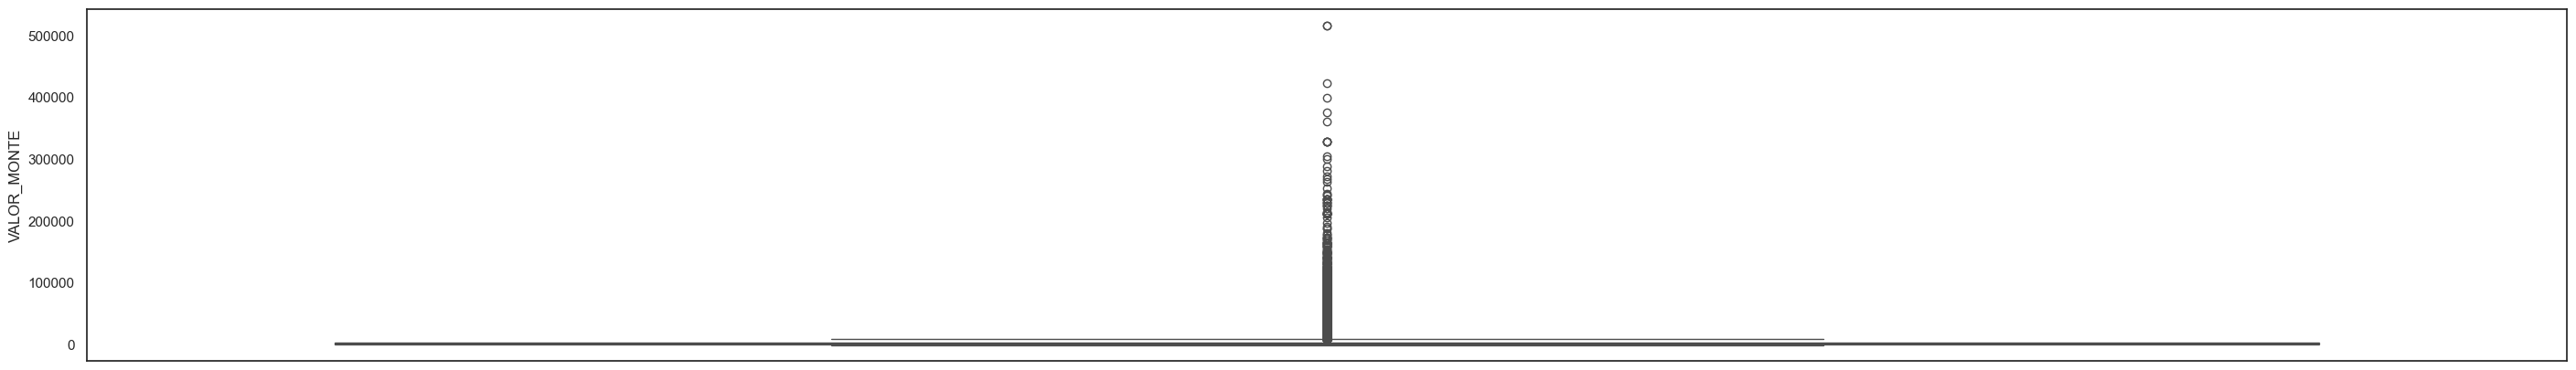

In [322]:
sns.boxplot(df_relojes['VALOR_MONTE'])


2. VALOR_MONTE

In [323]:
percentile_25 = df_relojes["VALOR_MONTE"].quantile(0.25)
percentile_75 = df_relojes["VALOR_MONTE"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_relojes[(df_relojes["VALOR_MONTE"] < lower_limit) | (df_relojes["VALOR_MONTE"] > upper_limit)]
valormonte_outliers = IQR_outliers['VALOR_MONTE']

valormonte_outliers_df = pd.DataFrame(valormonte_outliers)
valormonte_outliers_df.columns = ['valormonte_outliers']
valormonte_outliers_df

,valormonte_outliers
64,17621.71
89,125020.00
92,10295.35
136,15735.60
165,35813.53
...,...
1047914,18144.82
1048251,28051.95
1048261,24736.10
1048378,12918.89


In [324]:
df_relojes.drop(valormonte_outliers_df.index, inplace=True)

<Axes: ylabel='VALOR_MONTE'>

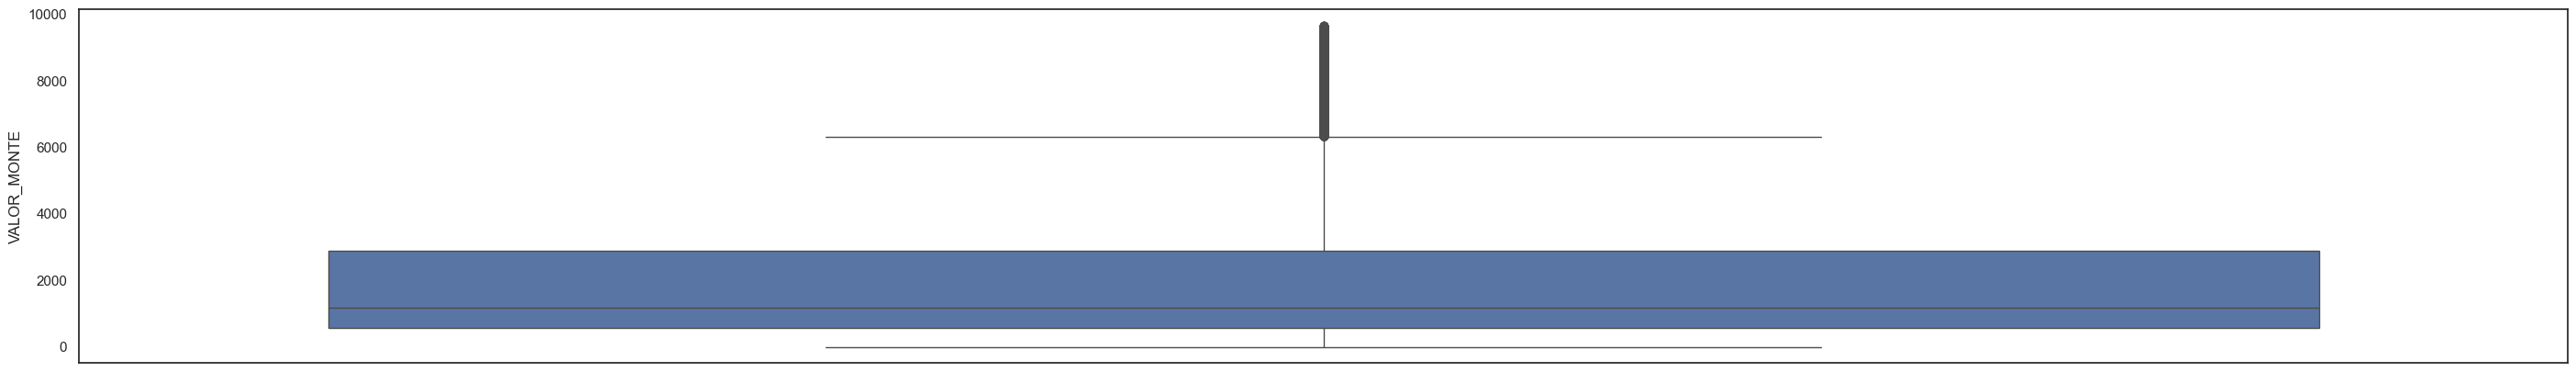

In [325]:
sns.boxplot(df_relojes['VALOR_MONTE'])

Analizando los gráficos vemos que el análisis mejoró mucho el nivel de valores atípicos de la variable en cuestión VALOR_MONTE.

4-5 PRESTAMO / PRECIO_VENTA_INICIAL

<Axes: ylabel='PRESTAMO'>

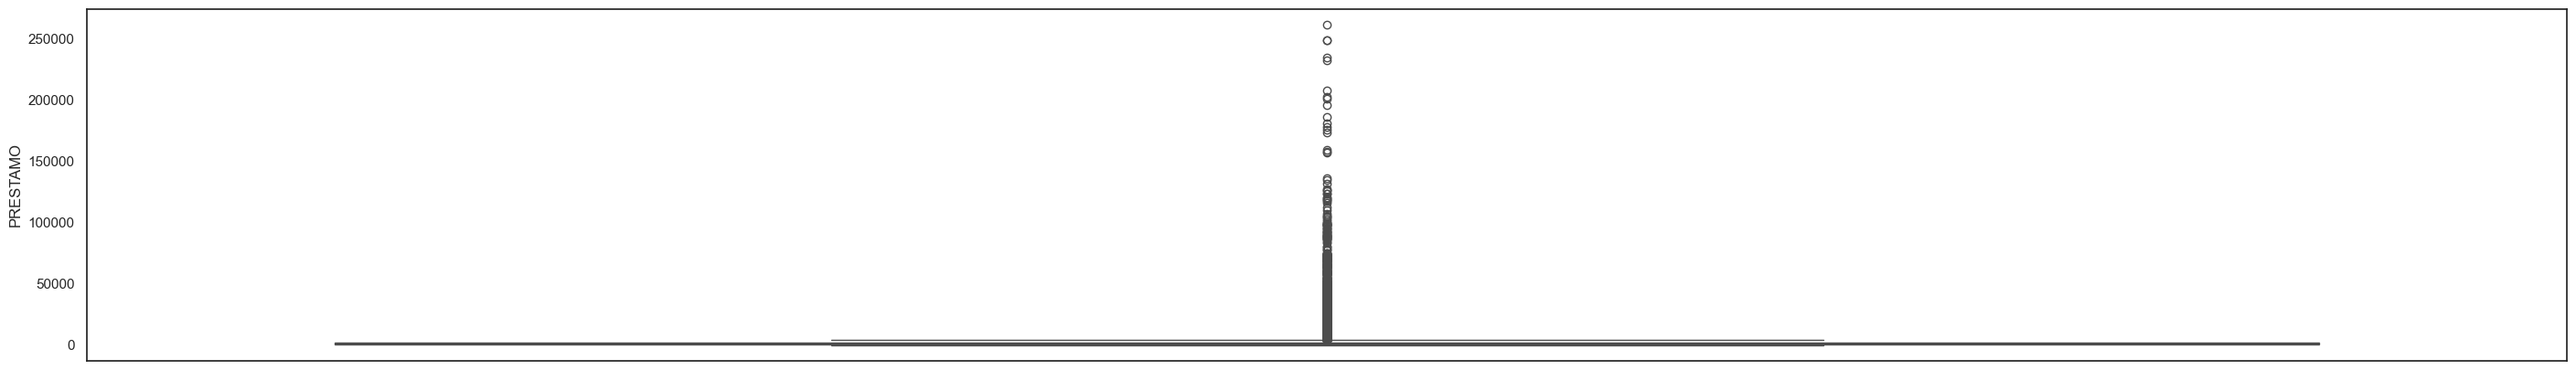

In [326]:
sns.boxplot(df_relojes['PRESTAMO'])

5. PRESTAMO

In [327]:
percentile_25 = df_relojes["PRESTAMO"].quantile(0.25)
percentile_75 = df_relojes["PRESTAMO"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_relojes[(df_relojes["PRESTAMO"] < lower_limit) | (df_relojes["PRESTAMO"] > upper_limit)]
prestamo_outliers = IQR_outliers['PRESTAMO']

prestamo_outliers_df = pd.DataFrame(prestamo_outliers)
prestamo_outliers_df.columns = ['prestamo_outliers']
prestamo_outliers_df

,prestamo_outliers
65,4686.37
175,6580.00
263,8742.00
521,7054.70
1333,5032.29
...,...
1048227,16841.98
1048229,7430.23
1048230,9941.44
1048234,7191.00


In [328]:
df_relojes.drop(prestamo_outliers_df.index, inplace=True)

<Axes: ylabel='PRESTAMO'>

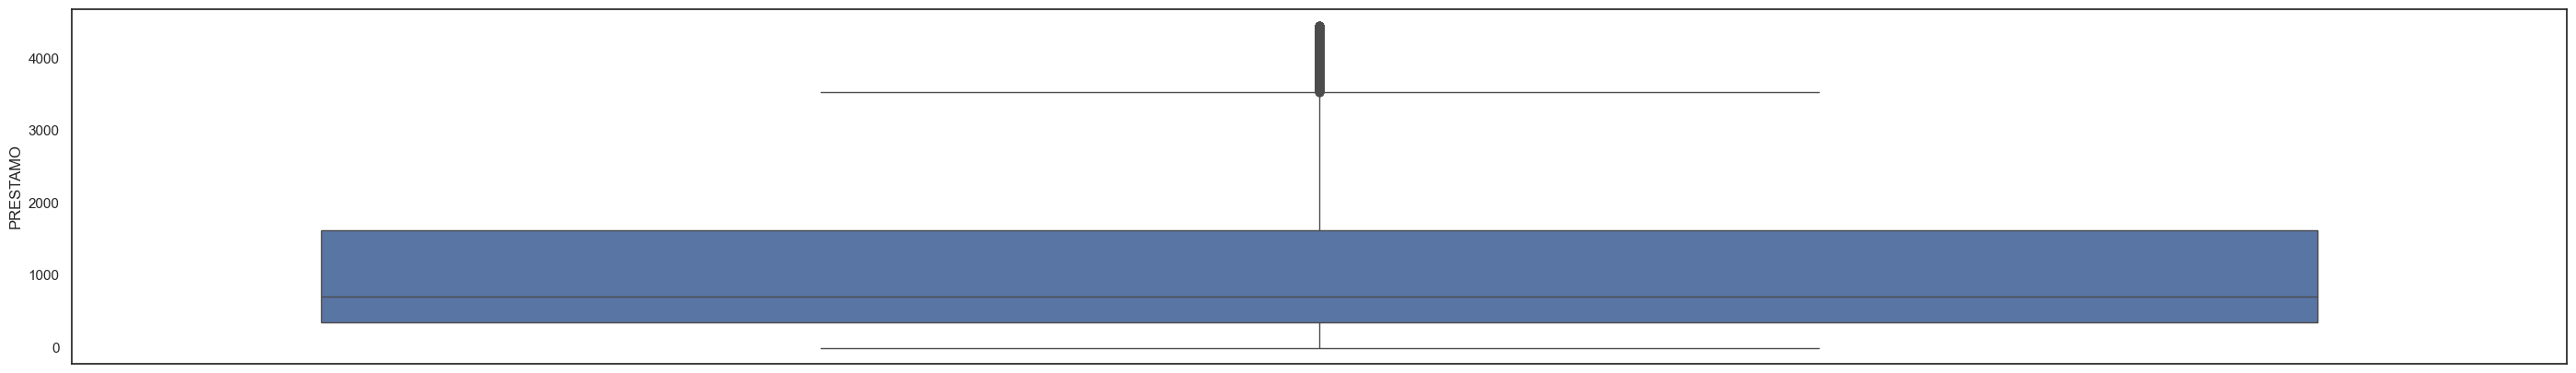

In [329]:
sns.boxplot(df_relojes['PRESTAMO'])

6. PRECIO_VENTA_INICIAL

<Axes: ylabel='PRECIO_VENTA_INICIAL'>

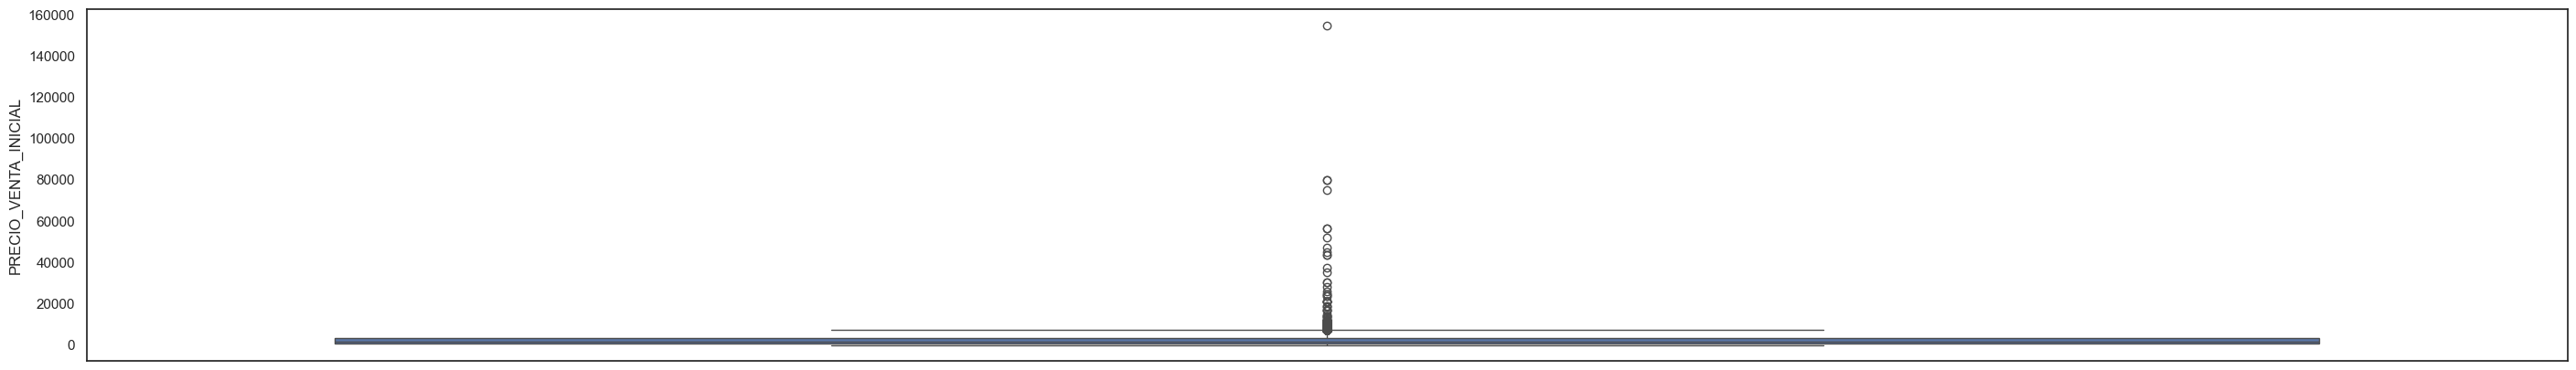

In [330]:
sns.boxplot(df_relojes['PRECIO_VENTA_INICIAL'])

In [331]:
percentile_25 = df_relojes["PRECIO_VENTA_INICIAL"].quantile(0.25)
percentile_75 = df_relojes["PRECIO_VENTA_INICIAL"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_relojes[(df_relojes["PRECIO_VENTA_INICIAL"] < lower_limit) | (df_relojes["PRECIO_VENTA_INICIAL"] > upper_limit)]
precio_venta_inicial_outliers = IQR_outliers['PRECIO_VENTA_INICIAL']

precio_venta_inicial_outliers_df = pd.DataFrame(precio_venta_inicial_outliers)
precio_venta_inicial_outliers_df.columns = ['precio_venta_inicial_outliers']
precio_venta_inicial_outliers_df

,precio_venta_inicial_outliers
73,9024.00
1336,10857.00
1622,7444.80
3261,7275.60
3312,11280.00
...,...
1040902,7332.00
1041459,9400.00
1043886,8469.40
1045868,11280.00


In [332]:
df_relojes.drop(precio_venta_inicial_outliers_df.index, inplace=True)

<Axes: ylabel='PRECIO_VENTA_INICIAL'>

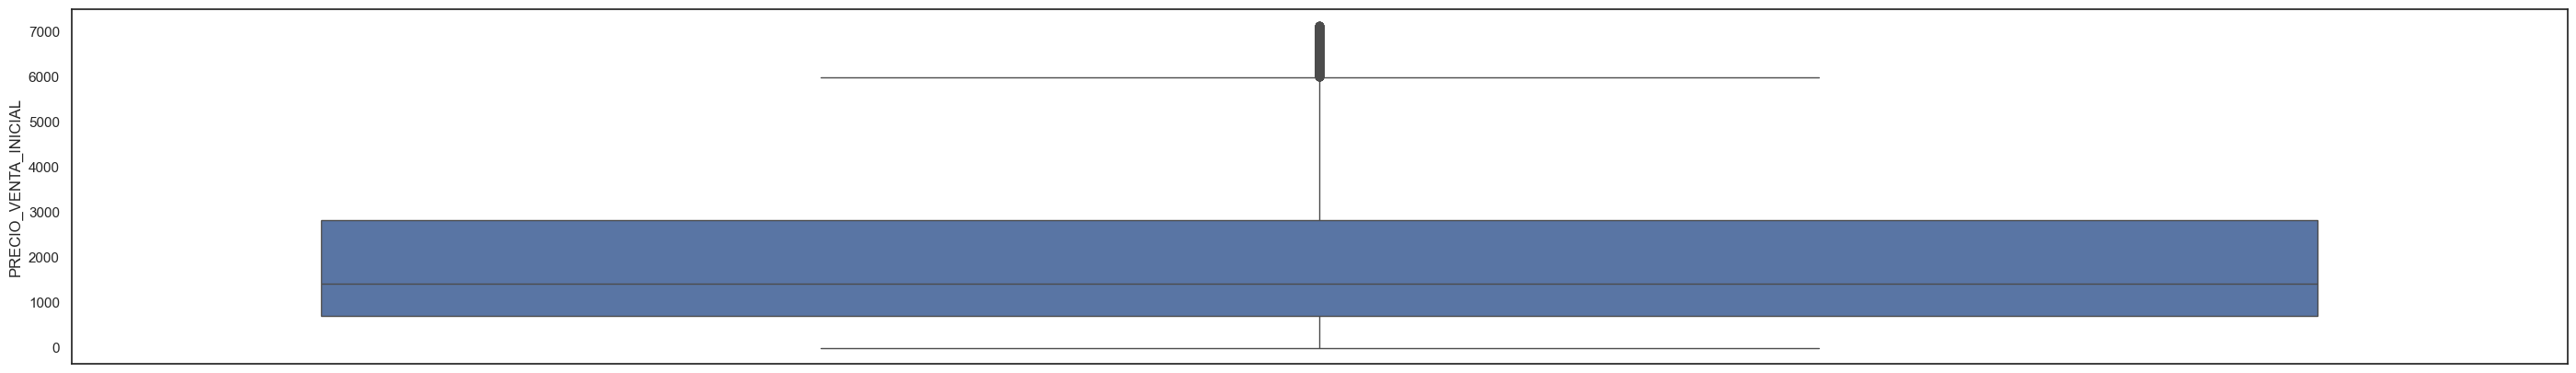

In [333]:
sns.boxplot(df_relojes['PRECIO_VENTA_INICIAL'])

7. PRECIO_VENTA_FINAL

<Axes: ylabel='PRECIO_VENTA_FINAL'>

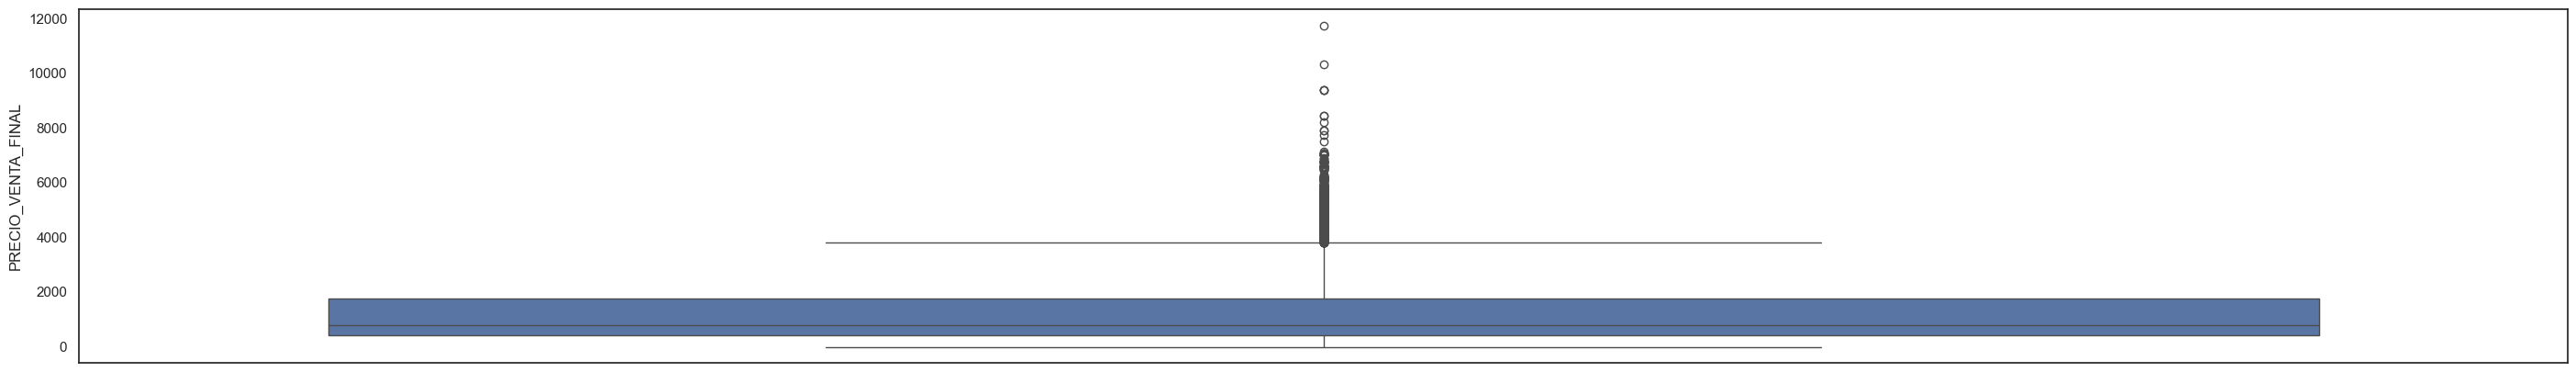

In [334]:
sns.boxplot(df_relojes['PRECIO_VENTA_FINAL'])

In [335]:
percentile_25 = df_relojes["PRECIO_VENTA_FINAL"].quantile(0.25)
percentile_75 = df_relojes["PRECIO_VENTA_FINAL"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_relojes[(df_relojes["PRECIO_VENTA_FINAL"] < lower_limit) | (df_relojes["PRECIO_VENTA_FINAL"] > upper_limit)]
precio_venta_final_outliers = IQR_outliers['PRECIO_VENTA_FINAL']

precio_venta_final_outliers_df = pd.DataFrame(precio_venta_final_outliers)
precio_venta_final_outliers_df.columns = ['precio_venta_inicial_outliers']
precio_venta_final_outliers_df

,precio_venta_inicial_outliers
664,3924.50
2562,4512.00
2577,4472.05
2825,4565.11
3421,6077.10
...,...
1047294,3924.50
1047411,4316.95
1048199,8459.53
1048209,4229.53


In [336]:
df_relojes.drop(precio_venta_final_outliers_df.index, inplace=True)

<Axes: ylabel='PRECIO_VENTA_FINAL'>

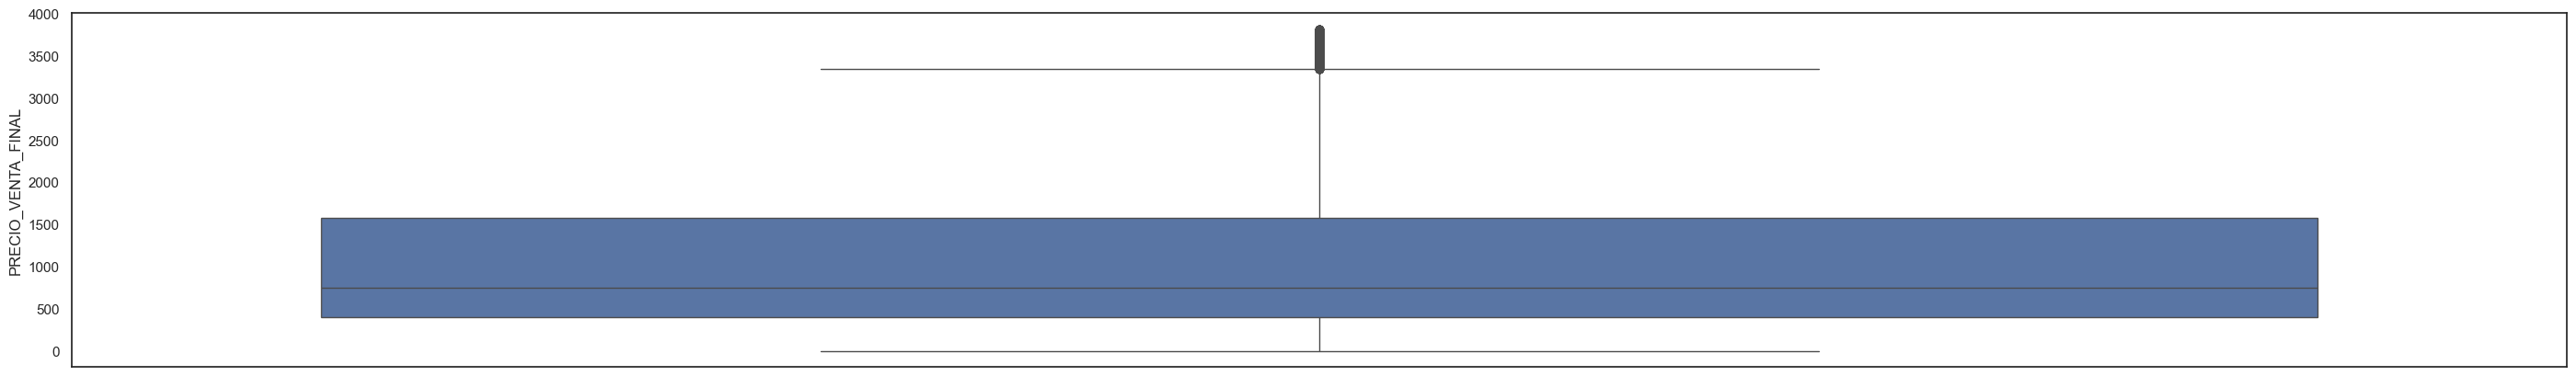

In [337]:
sns.boxplot(df_relojes['PRECIO_VENTA_FINAL'])

8-9. DEMASIA / INTERES

Revisando los valores atípicos de las variables, vamos a proceder a analizar la proporción de valores para las variables de DEMASIA

8. DEMASIA

<Axes: ylabel='DEMASIA'>

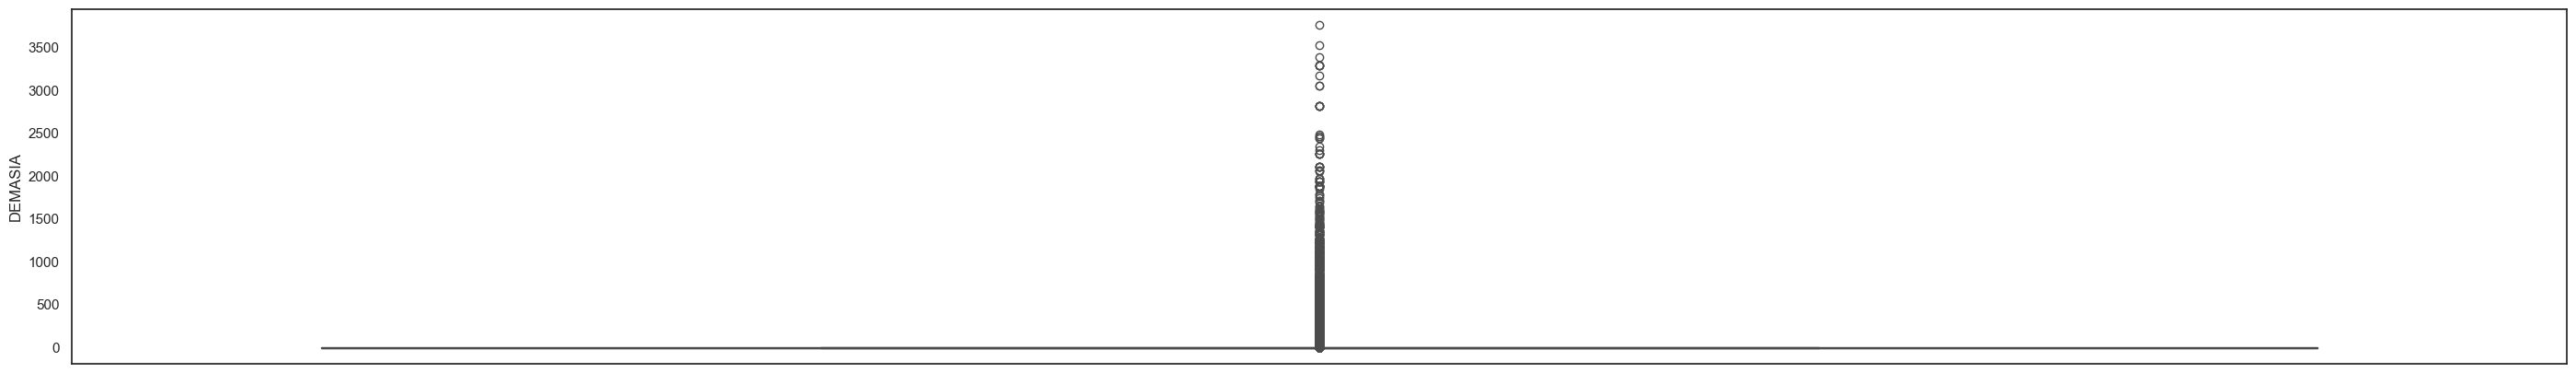

In [338]:
sns.boxplot(df_relojes['DEMASIA'])

In [339]:
percentile_25 = df_relojes["DEMASIA"].quantile(0.25)
percentile_75 = df_relojes["DEMASIA"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_relojes[(df_relojes["DEMASIA"] < lower_limit) | (df_relojes["DEMASIA"] > upper_limit)]
demasia_final_outliers = IQR_outliers['DEMASIA']

demasia_final_outliers_df = pd.DataFrame(demasia_final_outliers)
demasia_final_outliers_df.columns = ['demasia_outliers']
demasia_final_outliers_df

,demasia_outliers
400,154.1600
1931,31.0200
2569,97.3558
2779,38.3614
2823,96.5803
...,...
1048194,582.8000
1048211,757.1700
1048214,874.6700
1048220,91.1800


In [340]:
df_relojes.drop(demasia_final_outliers_df.index, inplace=True)

<Axes: ylabel='DEMASIA'>

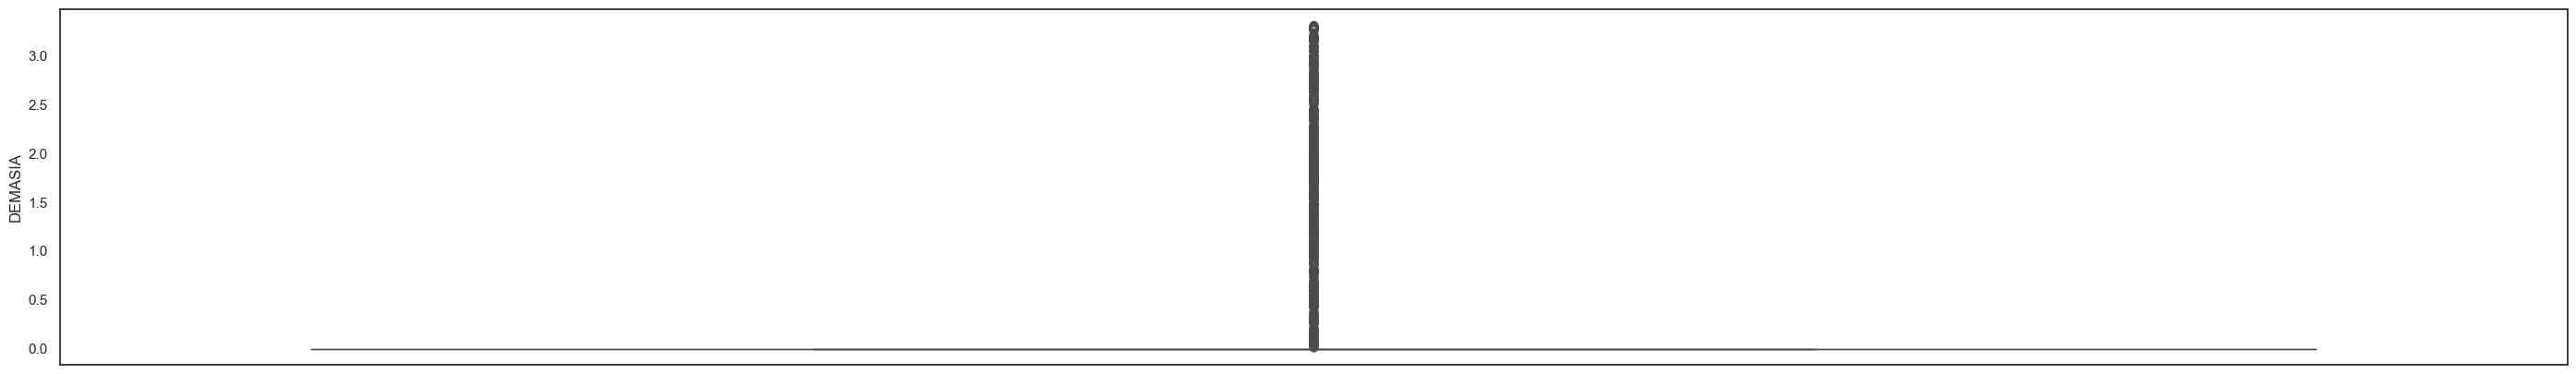

In [341]:
sns.boxplot(df_relojes['DEMASIA'])

<Axes: ylabel='INTERES'>

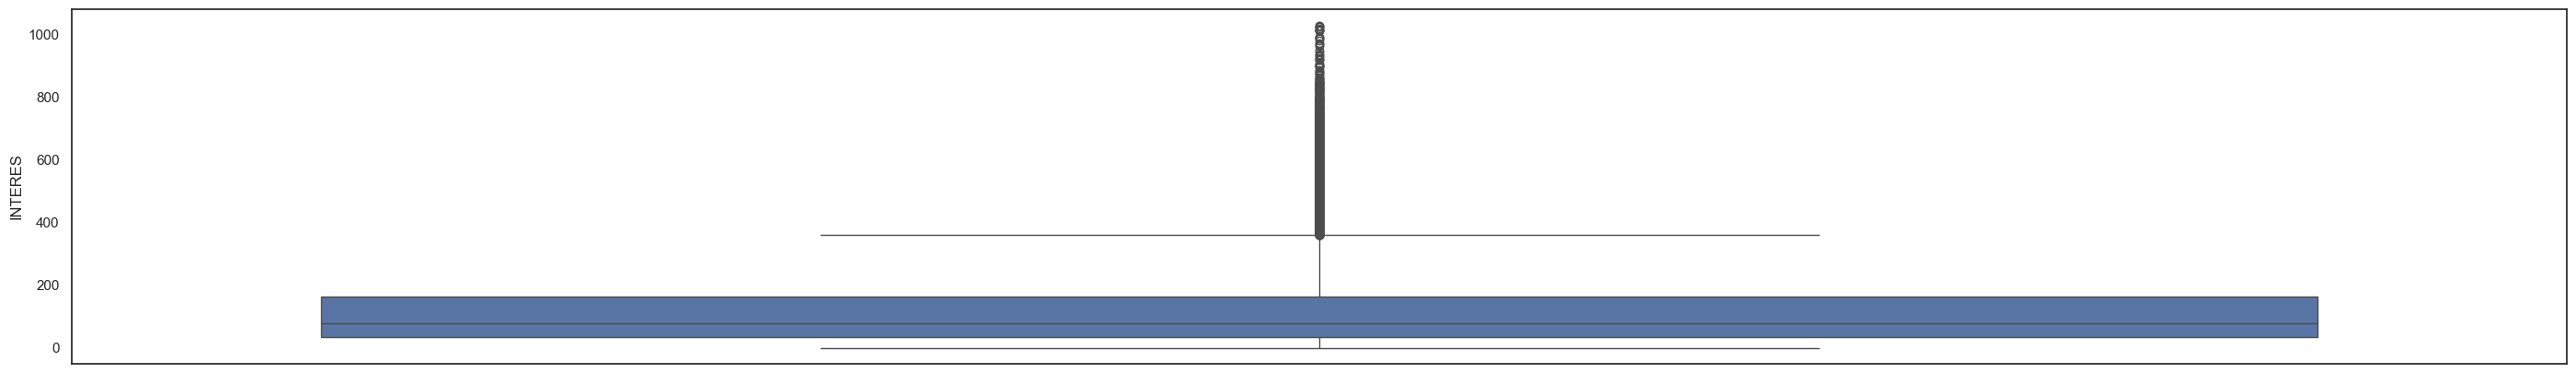

In [342]:
sns.boxplot(df_relojes['INTERES'])

12-17. INTERESALMONEDA / DES_EXT /IMPORTE_VENTA / TASA_OFERTA / PRECIO_VENTA_FINAL_SID / SALDO_INSOLUTO

<Axes: ylabel='INTERESALMONEDA'>

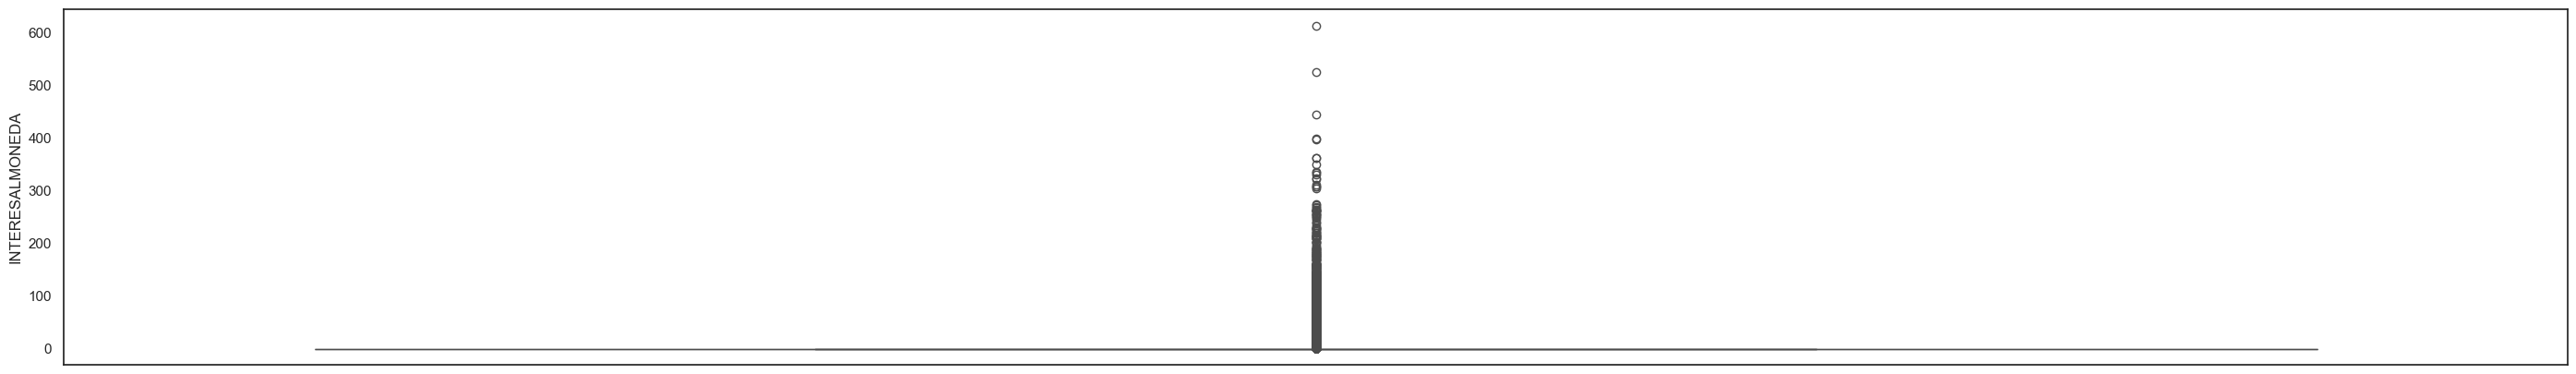

In [343]:
sns.boxplot(df_relojes['INTERESALMONEDA'])

Vamos a eliminar los valores atípicos de las variables INTERESALMONEDA

INTERESALMONEDA

In [344]:
percentile_25 = df_relojes["INTERESALMONEDA"].quantile(0.25)
percentile_75 = df_relojes["INTERESALMONEDA"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_relojes[(df_relojes["INTERESALMONEDA"] < lower_limit) | (df_relojes["INTERESALMONEDA"] > upper_limit)]
interesalmoneda_outliers = IQR_outliers['INTERESALMONEDA']

interesalmoneda_outliers_df = pd.DataFrame(interesalmoneda_outliers)
interesalmoneda_outliers_df.columns = ['interesalmoneda_outliers']
interesalmoneda_outliers_df

,interesalmoneda_outliers
1156,27.5420
1401,139.6182
2058,47.4371
2070,4.1642
2665,33.3935
...,...
1047827,103.3154
1047878,9.4987
1047892,23.0488
1047894,11.2800


In [345]:
df_relojes.drop(interesalmoneda_outliers_df.index, inplace=True)

<Axes: ylabel='INTERESALMONEDA'>

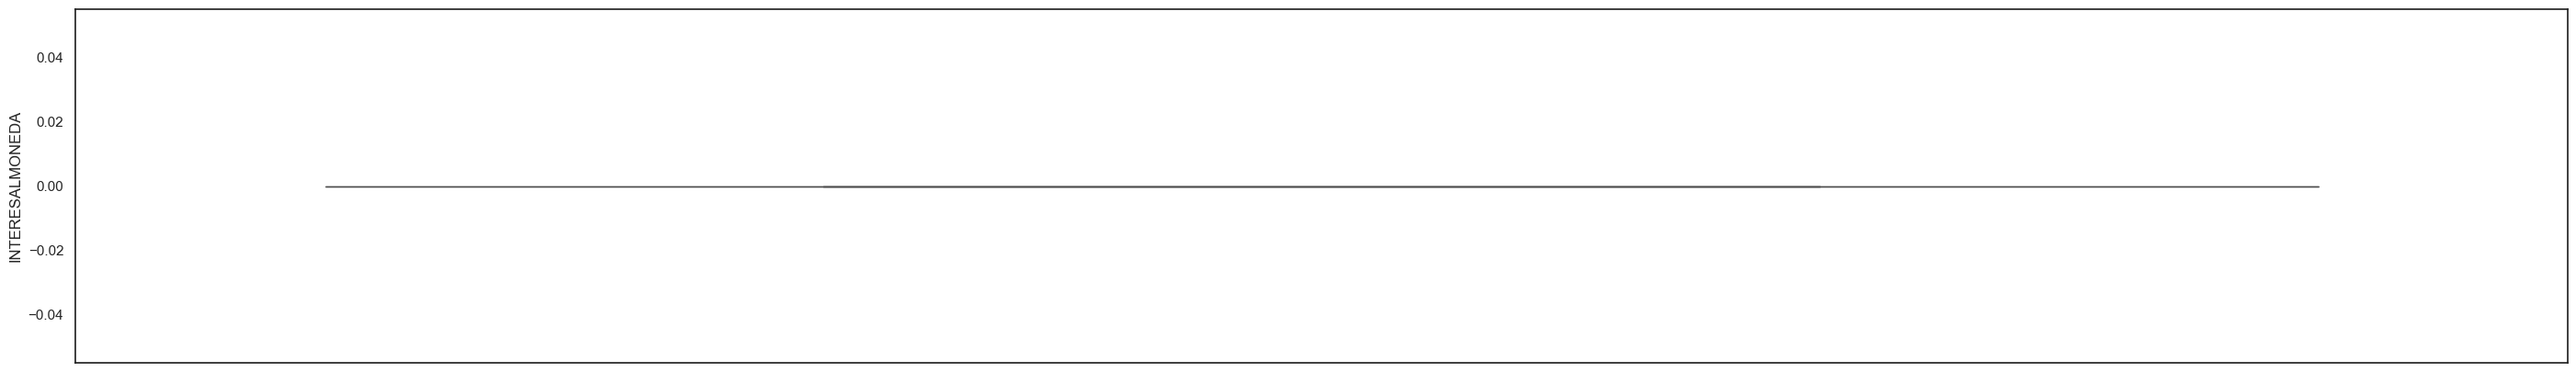

In [346]:
sns.boxplot(df_relojes['INTERESALMONEDA'])

DES_EXT

<Axes: ylabel='DES_EXT'>

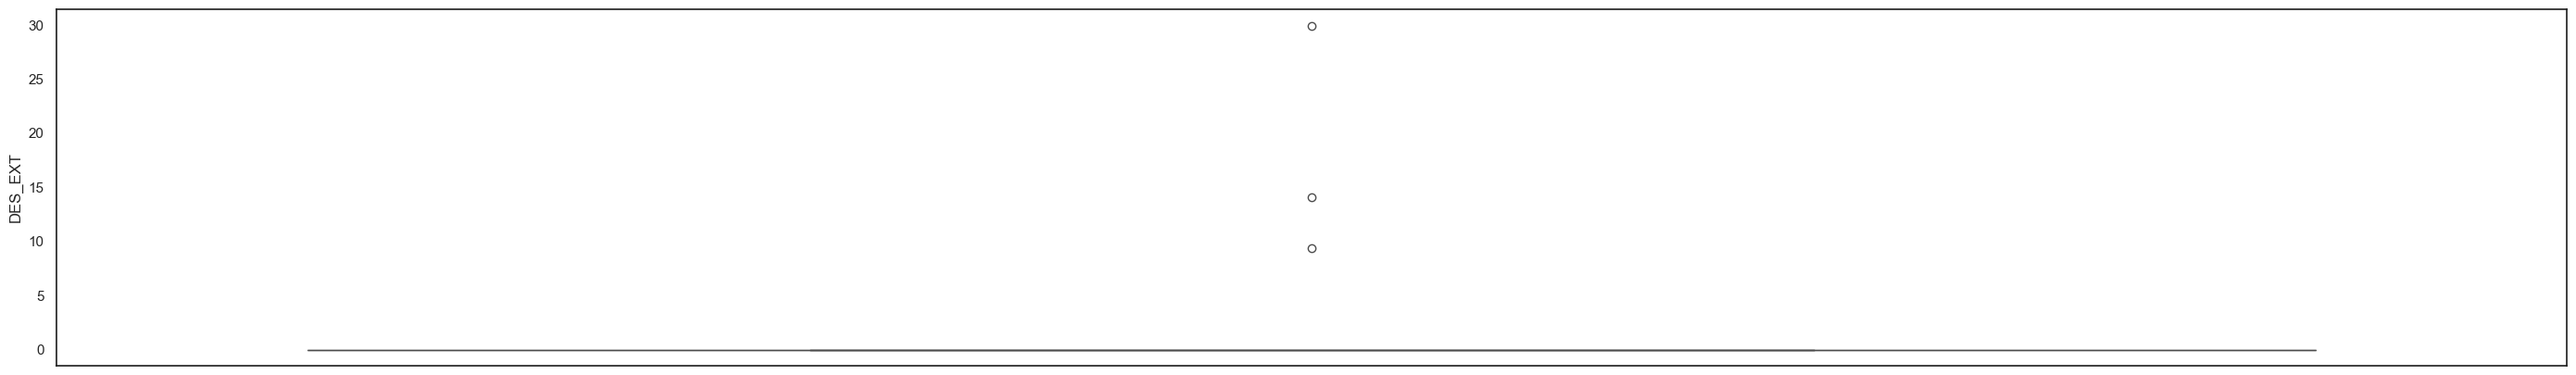

In [347]:
sns.boxplot(df_relojes['DES_EXT'])

In [348]:
percentile_25 = df_relojes["DES_EXT"].quantile(0.25)
percentile_75 = df_relojes["DES_EXT"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_relojes[(df_relojes["DES_EXT"] < lower_limit) | (df_relojes["DES_EXT"] > upper_limit)]
des_ext_outliers = IQR_outliers['DES_EXT']

des_ext_outliers_df = pd.DataFrame(des_ext_outliers)
des_ext_outliers_df.columns = ['des_ext_outliers']
des_ext_outliers_df

,des_ext_outliers
325732,29.9625
940478,14.1000
945308,9.4000


In [349]:
df_relojes.drop(des_ext_outliers_df.index, inplace=True)

<Axes: ylabel='DES_EXT'>

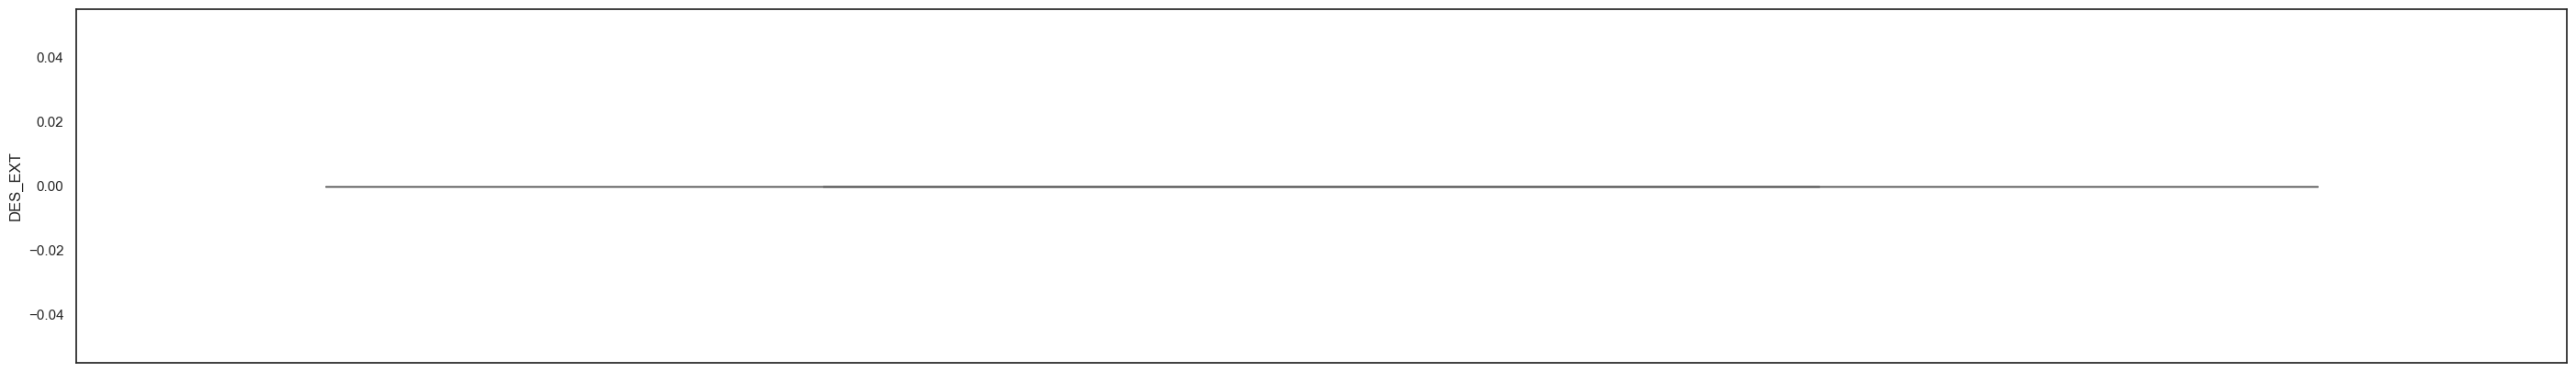

In [350]:
sns.boxplot(df_relojes['DES_EXT'])

IMPORTE_VENTA

<Axes: ylabel='IMPORTE_VENTA'>

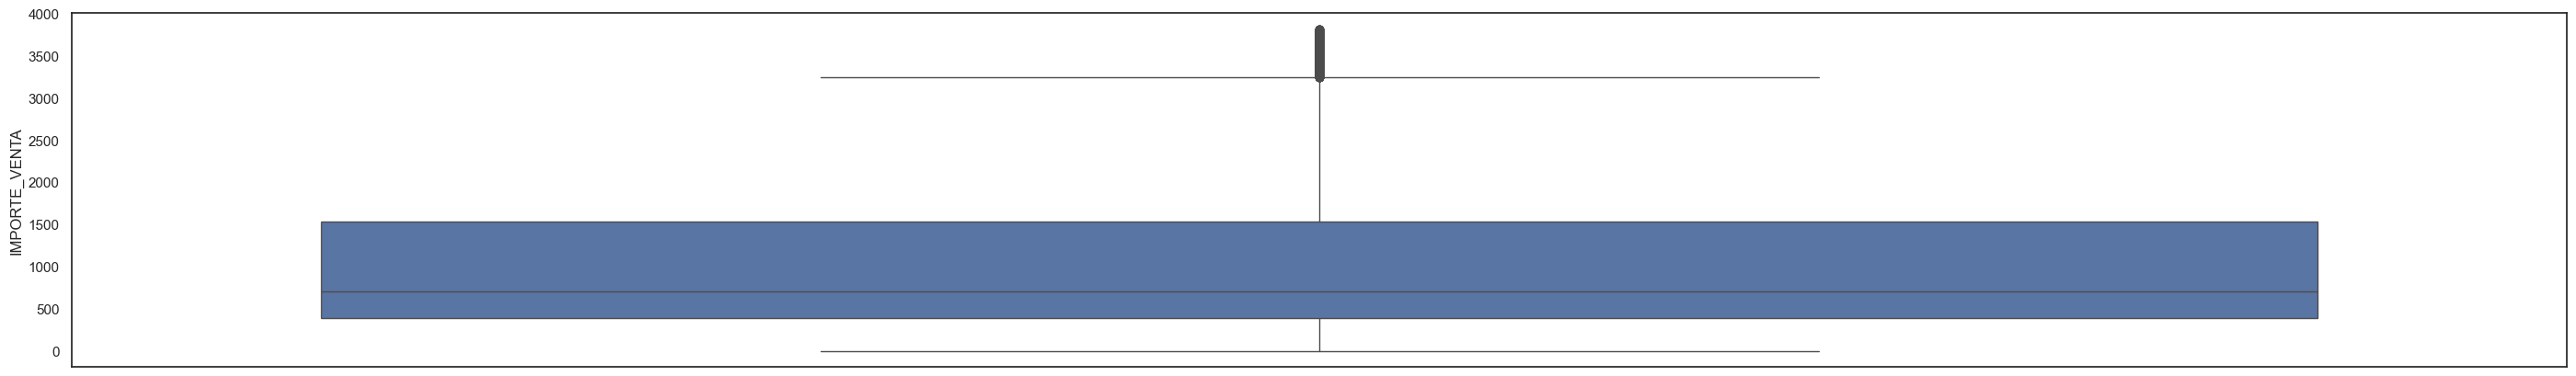

In [351]:
sns.boxplot(df_relojes['IMPORTE_VENTA'])

In [352]:
percentile_25 = df_relojes["IMPORTE_VENTA"].quantile(0.25)
percentile_75 = df_relojes["IMPORTE_VENTA"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_relojes[(df_relojes["IMPORTE_VENTA"] < lower_limit) | (df_relojes["IMPORTE_VENTA"] > upper_limit)]
importe_venta_outliers = IQR_outliers['IMPORTE_VENTA']

importe_venta_outliers_df = pd.DataFrame(importe_venta_outliers)
importe_venta_outliers_df.columns = ['importe_venta']
importe_venta_outliers_df

,importe_venta
148,3582.81
309,3723.34
1854,3514.66
4332,3251.46
5600,3572.47
...,...
1042617,3381.18
1043193,3411.26
1043330,3440.40
1043471,3440.40


In [353]:
df.drop(importe_venta_outliers_df.index, inplace=True)

Posterior a éste análisis detectamos que las variables DES_EXT y CANAL no agregan valor. Adicional, lo revisamos en conjunto con Héctor Vidal de NMP. Es por esa razón que decidimos eliminar estas columnas del dataframe

In [354]:
df_relojes.drop(['DES_EXT','CANAL'], axis=1,inplace=True)

#Imputación de datos perdidos o inexistentes

In [355]:
numeric_feat =df_relojes.select_dtypes(include=['int64', 'float64']).columns            # seleccionamos las columnas con tipo de dato numérico
cat_var_feat = df_relojes.select_dtypes(include=['object']).columns                     # seleccionamos las columns con tipo de dato categórico

df_relojes[numeric_feat] = df_relojes[numeric_feat].apply(lambda x: x.fillna(x.median()))       # en las variables numéricas decidimos aplicar la imputación de mediana, ya que las distribuciones están sesgadas a la izquierda mayormente
df_relojes[cat_var_feat] = df_relojes[cat_var_feat].apply(lambda x: x.fillna(x.mode()[0]))      # decidimos aplicar imputación de moda a las variables categóricas

In [356]:
df_relojes.isnull().sum()*100/len(df)

SUCURSAL                  0.000000
ESTADO_SUCURSAL           0.000000
ORIGEN                    0.000000
VALOR_MONTE               0.000000
PRESTAMO                  0.000000
PRECIO_VENTA_INICIAL      0.000000
PRECIO_VENTA_FINAL        0.000000
FECHA_EMPENO              1.442880
FECHA_COMERCIALIZACION    1.498420
SUBRAMO                   0.000000
REFRENDOS_REALIZADOS      0.000000
VALUADOR                  0.000000
FECHA_HORA_MOV            1.554627
DEMASIA                   0.000000
INTERES                   0.000000
INTERESALMONEDA           0.000000
IMPORTE_VENTA             0.000000
PRODUCTO                  0.000000
TASA_OFERTA               0.000000
DIAS_ALMONEDA             0.000000
PRECIO_VENTA_FINAL_SID    0.000000
TIPO_PRENDA               0.000000
FCH_CARGA                 1.537355
SALDO_INSOLUTO            0.000000
FECHA_CARGA               0.000000
dtype: float64

Interpretación. Podemos observar que los datos faltanates únicamente ya corresponden a las fechas, las cuales vamos a determinar más adelante el plan de acción con las mismas

#**Evaluación de correlaciones entre variables numéricas**

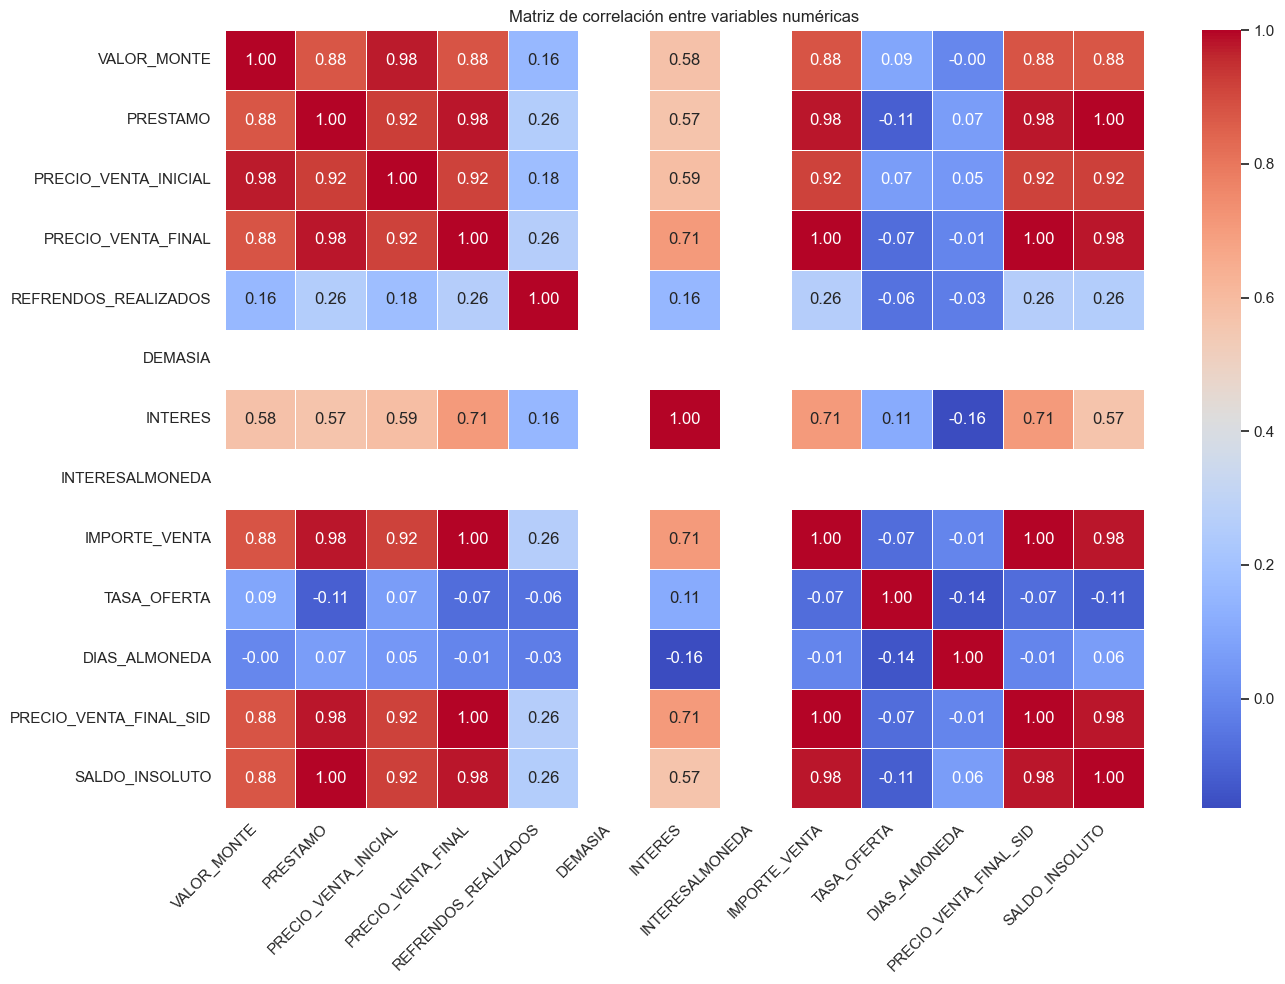

In [357]:
df_numericas = df_relojes.select_dtypes(include=['number'])                                                                     # Selecciona solo las columnas numericas

correlation_matrix = df_numericas.corr()                                                                                # Calcula la matriz de correlación



plt.figure(figsize=(14, 10))                                                                                            # Ajusta tamaño según número de variables
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)                                 # Crea el mapa de calor
plt.title("Matriz de correlación entre variables numéricas")                                                            # Título
plt.xticks(rotation=45, ha='right')                                                                                     # Rotación de etiquetas
plt.yticks(rotation=0)                                                                                                  # Rotación de etiquetas
plt.tight_layout()                                                                                                      # Ajusta el espaciado
plt.show()

In [358]:
df_numericas = df_relojes.select_dtypes(include=['number'])
corr = df_numericas.corr()                                                                                                    # Calcular la matriz de correlación

correlation_threshold = 0.8                                                                                                   # Umbral de correlación


positive_correlations = corr[corr > correlation_threshold].stack().reset_index()                                              # Extraer los pares de variables con correlaciones mayor al umbral
positive_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']                                                   # Renombrar las columnas del resultado
positive_correlations = positive_correlations[positive_correlations['Variable 1'] != positive_correlations['Variable 2']]     # Eliminar correlaciones redundatnes entre la misma variable

negative_correlations = corr[corr < -correlation_threshold].stack().reset_index()                                             # Extraer solo los pares de variables con correlacion menor que el umbral negativo
negative_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
negative_correlations = negative_correlations[negative_correlations['Variable 1'] != negative_correlations['Variable 2']]     # Eliminar autocorrelaciones

print("Correlaciones Positivas Fuertes (> 0.7):")                                                                             # Imprime las correlaciones positivas y negativas
print(positive_correlations.sort_values(by='Correlation', ascending=False))

print("\ Correlaciones Negativas Fuertes (< -0.7):")
print(negative_correlations.sort_values(by='Correlation', ascending=True))

Correlaciones Positivas Fuertes (> 0.7):
                Variable 1              Variable 2  Correlation
26      PRECIO_VENTA_FINAL  PRECIO_VENTA_FINAL_SID     1.000000
42  PRECIO_VENTA_FINAL_SID      PRECIO_VENTA_FINAL     1.000000
25      PRECIO_VENTA_FINAL           IMPORTE_VENTA     0.999999
43  PRECIO_VENTA_FINAL_SID           IMPORTE_VENTA     0.999999
35           IMPORTE_VENTA  PRECIO_VENTA_FINAL_SID     0.999999
33           IMPORTE_VENTA      PRECIO_VENTA_FINAL     0.999999
47          SALDO_INSOLUTO                PRESTAMO     0.999861
13                PRESTAMO          SALDO_INSOLUTO     0.999861
50          SALDO_INSOLUTO           IMPORTE_VENTA     0.977972
36           IMPORTE_VENTA          SALDO_INSOLUTO     0.977972
49          SALDO_INSOLUTO      PRECIO_VENTA_FINAL     0.977971
45  PRECIO_VENTA_FINAL_SID          SALDO_INSOLUTO     0.977971
27      PRECIO_VENTA_FINAL          SALDO_INSOLUTO     0.977971
51          SALDO_INSOLUTO  PRECIO_VENTA_FINAL_SID     0.977971

<>:18: SyntaxWarning: invalid escape sequence '\ '
<>:18: SyntaxWarning: invalid escape sequence '\ '
C:\Users\HP\AppData\Local\Temp\ipykernel_8980\4196766440.py:18: SyntaxWarning: invalid escape sequence '\ '
  print("\ Correlaciones Negativas Fuertes (< -0.7):")


#**Transformación de variables numéricas**

Nuestra variable de salida u objetivo se denomina DIAS_ALMONEDA, que son los días que transcurren entre que llega el artículo y la fecha de movimiento (venta). Vamos a observar su distribución

<Axes: xlabel='DIAS_ALMONEDA', ylabel='Count'>

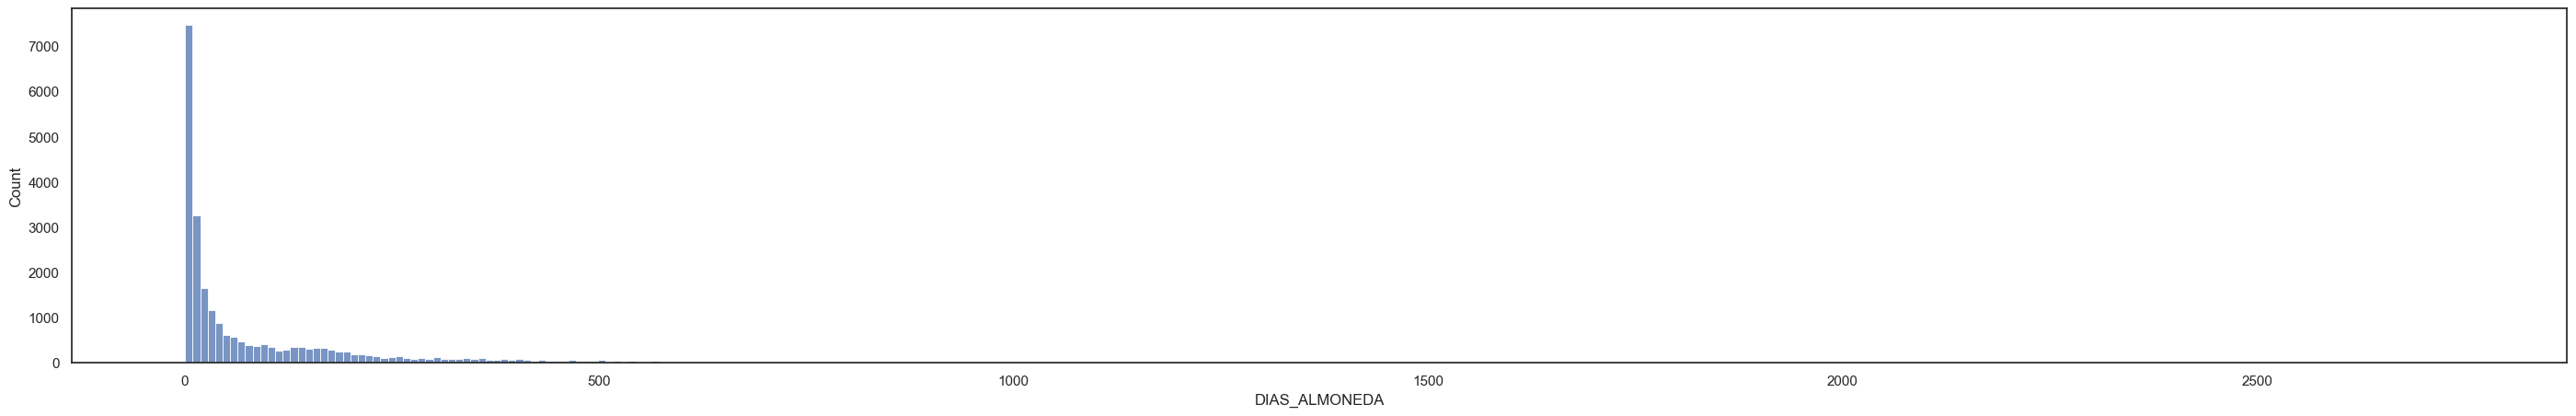

In [359]:

sns.histplot(df_relojes, x='DIAS_ALMONEDA')

Podemos visualizar que el rango de la variable objetivo no tiene una distribución normal, y efectivamente gran parte de las observaciones se encuentra en un rango de más de 151 días, lo que nos demuestra la lenta rotación de artículos.

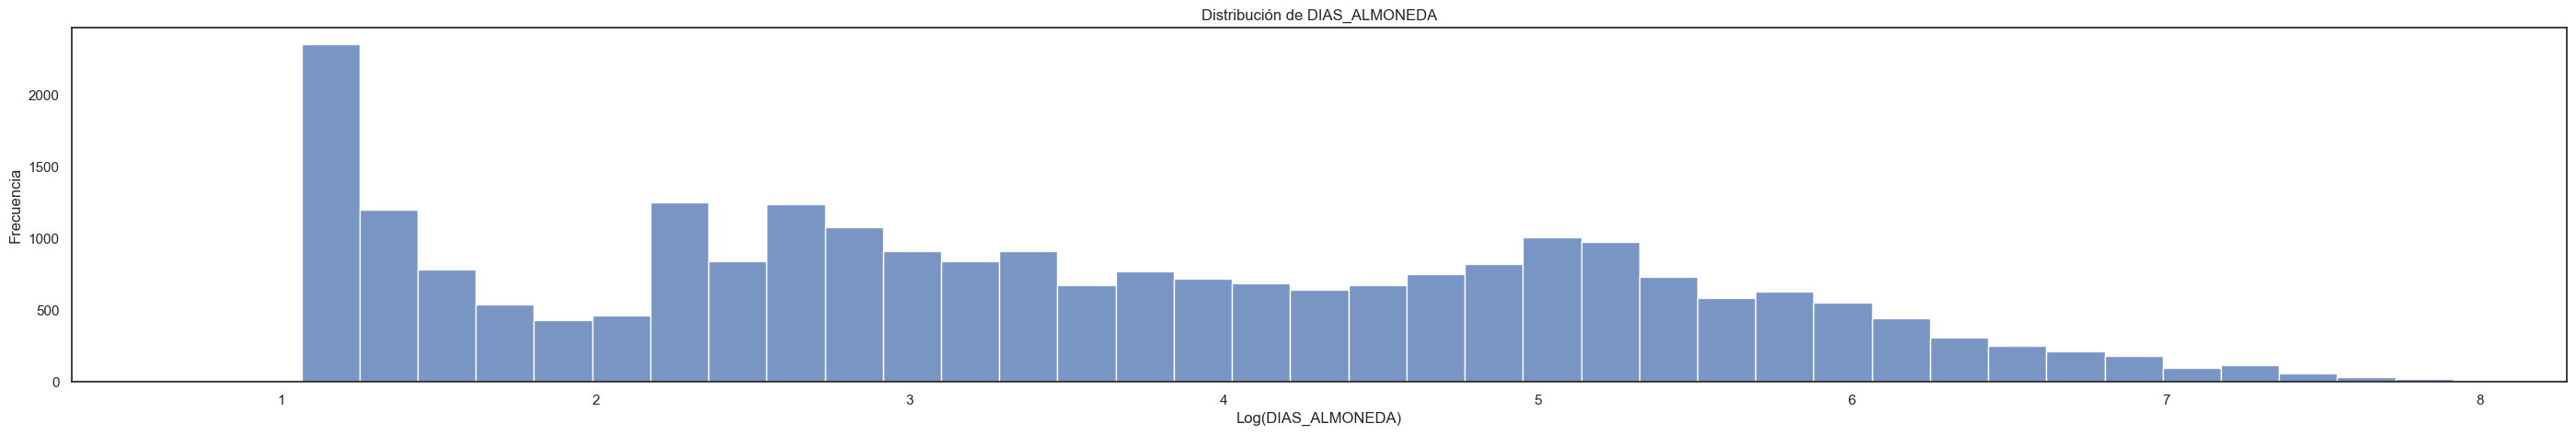

In [360]:
sample_df = df_relojes[df_relojes['DIAS_ALMONEDA'] >=0]                            # Filtrar solo los valores positivos
sample_df = sample_df.dropna(subset=['DIAS_ALMONEDA'])                           # Eliminar filas con valores faltantes en 'DIAS_ALMONEDA'

sample_df['DIAS_ALMONEDA_LOG'] = np.log1p(sample_df['DIAS_ALMONEDA'])            # Aplicar logaritmo a la columna 'DIAS_ALMONEDA'
sns.histplot(sample_df, x='DIAS_ALMONEDA_LOG')
plt.xlabel('Log(DIAS_ALMONEDA)')                                                  # Etiqueta del eje x
plt.ylabel('Frecuencia')                                                          # Etiqueta del eje y
plt.title('Distribución de DIAS_ALMONEDA')                                        # Título del gráfico
plt.show()

**Justificación del uso de transformación logarítmica en DIAS_ALMONEDA**

La variable DIAS_ALMONEDA representa el número de días que un artículo ha permanecido en inventario, y presenta una distribución altamente sesgada a la derecha, donde la mayoria de los valores se concentran cerca de cero y existen valores extremos mucho mayores. Para abordar el sesgo se aplicó una transformacion logarítmica que reduce el impacto de valores extremos, viendo que la distribución sea más simétrica y adecuada para el modelo.

In [361]:
#df = df[df['DIAS_ALMONEDA'] >= 0]                                                 # Filtrar solo los valores positivos
#df = df.dropna(subset=['DIAS_ALMONEDA'])                                          # Eliminar filas con valores faltantes en 'DIAS_ALMONEDA'
#df['DIAS_ALMONEDA_LOG'] = np.log1p(df['DIAS_ALMONEDA'])                           # Aplicar transformacion logaritmica al DF procesado


Relojes

A continuación vamos a separar el dataset con el ramo de relojes para analizar el nicho

A continuación vamos a revisar las distribuciones de nuestras variables numéricas para revisar si aplica el escalamiento y transformación

In [362]:
num_var_list = ['VALOR_MONTE','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','REFRENDOS_REALIZADOS']


In [363]:
num_var_list_2 = ['DEMASIA','INTERES','INTERESALMONEDA','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID','SALDO_INSOLUTO']

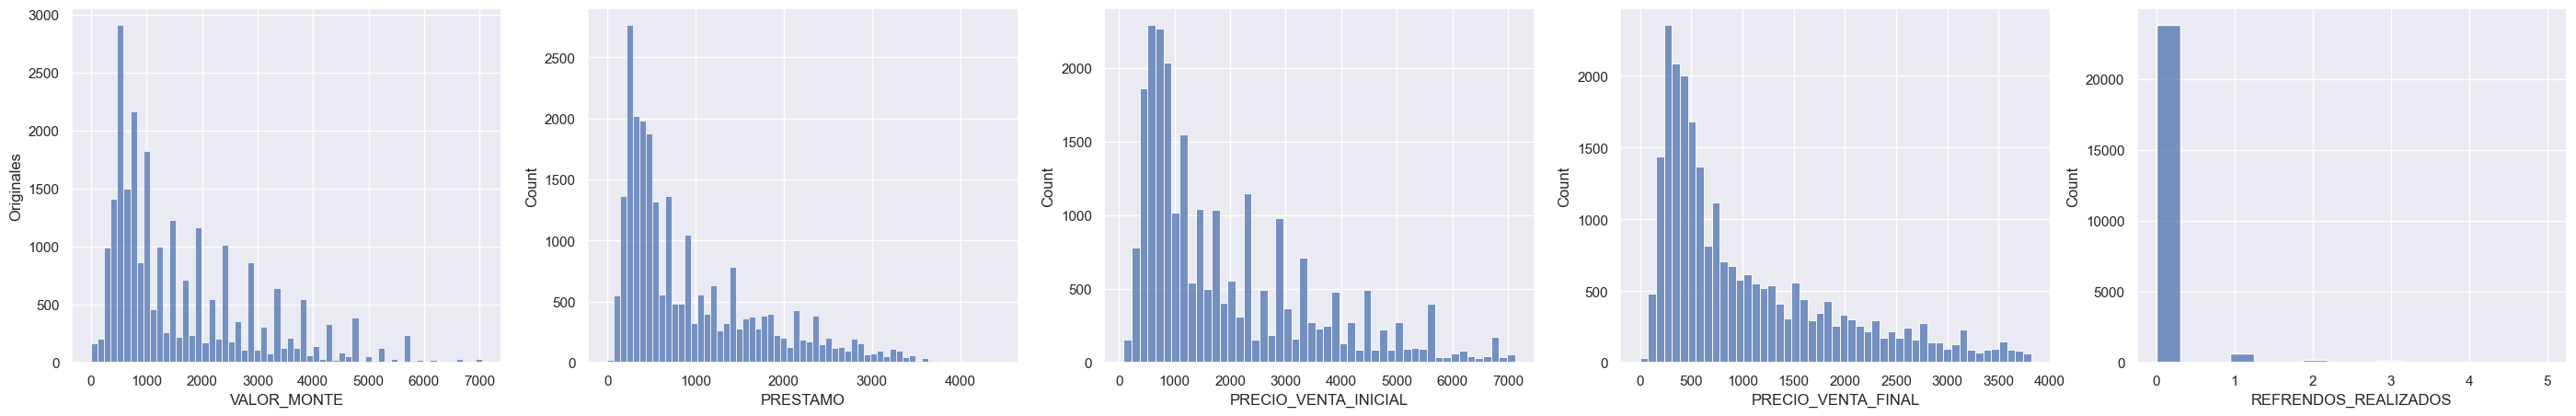

In [364]:
sns.set(rc={'figure.figsize':(35,5)})
fig, axes = plt.subplots(1,5)
for k in range(0,5):
# Datos originales
  plt.subplot(1,5, k+1)

  Transf0 = df_relojes[num_var_list[k]]
  sns.histplot(Transf0)
  plt.xlabel(num_var_list[k])
  if k == 0:
    plt.ylabel('Originales')

plt.show()

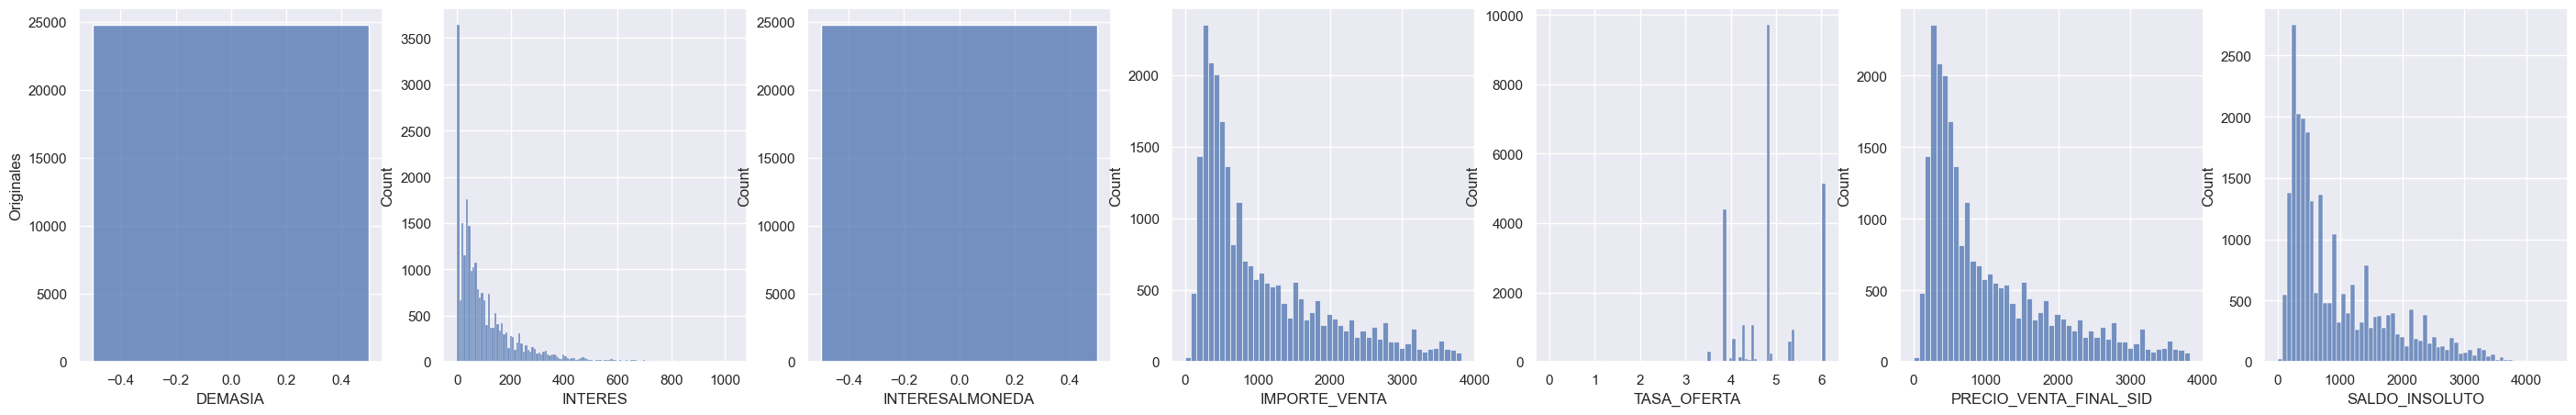

In [365]:
sns.set(rc={'figure.figsize':(35,5)})
fig, axes = plt.subplots(1,7)
for k in range(0,7):
# Datos originales
  plt.subplot(1,7, k+1)

  Transf0 = df_relojes[num_var_list_2[k]]
  sns.histplot(Transf0)
  plt.xlabel(num_var_list_2[k])
  if k == 0:
    plt.ylabel('Originales')

plt.show()

Interpretación: Podemos observar que prácticamente todas las variables numéricas cuentan con un sesgo a la izquierda, por lo que primero vamos a aplicar es una transformación  *Yeo-Johnson*,que se puede utilizar en variables con valores cero y negativos, así como valores positivos. Posteriormente aplicaremos un escalamiento Min-Max.

In [366]:
df_1 = df_relojes.copy()
transformer = PowerTransformer(method="yeo-johnson")
transformer.fit(df_1[['VALOR_MONTE','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','REFRENDOS_REALIZADOS',
                'DEMASIA','INTERES','INTERESALMONEDA','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID',
                'SALDO_INSOLUTO']])
transf = transformer.transform(df_1[['VALOR_MONTE','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','REFRENDOS_REALIZADOS',
                'DEMASIA','INTERES','INTERESALMONEDA','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID',
                'SALDO_INSOLUTO']])

In [367]:
transf_df = pd.DataFrame(transf)
transf_df.columns = ['VALOR_MONTE','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','REFRENDOS_REALIZADOS',
                'DEMASIA','INTERES','INTERESALMONEDA','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID',
                'SALDO_INSOLUTO']
transf_df

,VALOR_MONTE,PRESTAMO,PRECIO_VENTA_INICIAL,PRECIO_VENTA_FINAL,REFRENDOS_REALIZADOS,DEMASIA,INTERES,INTERESALMONEDA,IMPORTE_VENTA,TASA_OFERTA,PRECIO_VENTA_FINAL_SID,SALDO_INSOLUTO
0,-1.115875,-1.033900,-1.227283,-1.409598,-0.20145,0.0,-1.756163,0.0,-1.409559,-0.063481,-1.409598,-1.032770
1,-0.047604,-0.132119,0.074290,-0.517834,-0.20145,0.0,-1.756163,0.0,-0.517809,0.000669,-0.517834,-0.131201
2,-0.492678,-0.108200,-0.420376,-0.201215,-0.20145,0.0,-0.830070,0.0,-0.201195,-1.229970,-0.201215,-0.107286
3,0.481661,0.869083,0.595987,0.881899,-0.20145,0.0,0.737934,0.0,0.881904,-0.063481,0.881899,0.869887
4,1.071539,1.446903,1.376425,1.594805,-0.20145,0.0,2.096600,0.0,1.594800,0.702204,1.594805,1.447701
...,...,...,...,...,...,...,...,...,...,...,...,...
24739,0.696194,1.046495,0.790261,1.071148,-0.20145,0.0,0.947822,0.0,1.071150,-1.308588,1.071148,1.047293
24740,0.199819,0.535711,0.326248,0.619524,-0.20145,0.0,0.943187,0.0,0.619532,-1.229970,0.619524,0.536539
24741,-3.713572,-0.118259,-1.008609,-0.266866,-0.20145,0.0,-1.756163,0.0,-0.266844,-1.756301,-0.266866,-0.117343
24742,0.370891,1.013198,0.761111,0.992578,-0.20145,0.0,0.532575,0.0,0.992581,-1.308588,0.992578,1.013997


In [368]:
scaler = preprocessing.StandardScaler().fit(transf_df[['VALOR_MONTE','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','REFRENDOS_REALIZADOS',
                'DEMASIA','INTERES','INTERESALMONEDA','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID',
                'SALDO_INSOLUTO']])
scaler= scaler.transform(transf_df[['VALOR_MONTE','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','REFRENDOS_REALIZADOS',
                'DEMASIA','INTERES','INTERESALMONEDA','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID',
                'SALDO_INSOLUTO']])

In [369]:
scaler_df = pd.DataFrame(scaler)
scaler_df.columns=['VALOR_MONTE','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','REFRENDOS_REALIZADOS',
                'DEMASIA','INTERES','INTERESALMONEDA','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID',
                'SALDO_INSOLUTO']
scaler_df

,VALOR_MONTE,PRESTAMO,PRECIO_VENTA_INICIAL,PRECIO_VENTA_FINAL,REFRENDOS_REALIZADOS,DEMASIA,INTERES,INTERESALMONEDA,IMPORTE_VENTA,TASA_OFERTA,PRECIO_VENTA_FINAL_SID,SALDO_INSOLUTO
0,-1.115875,-1.033900,-1.227283,-1.409598,-0.20145,0.0,-1.756163,0.0,-1.409559,-0.063481,-1.409598,-1.032770
1,-0.047604,-0.132119,0.074290,-0.517834,-0.20145,0.0,-1.756163,0.0,-0.517809,0.000669,-0.517834,-0.131201
2,-0.492678,-0.108200,-0.420376,-0.201215,-0.20145,0.0,-0.830070,0.0,-0.201195,-1.229970,-0.201215,-0.107286
3,0.481661,0.869083,0.595987,0.881899,-0.20145,0.0,0.737934,0.0,0.881904,-0.063481,0.881899,0.869887
4,1.071539,1.446903,1.376425,1.594805,-0.20145,0.0,2.096600,0.0,1.594800,0.702204,1.594805,1.447701
...,...,...,...,...,...,...,...,...,...,...,...,...
24739,0.696194,1.046495,0.790261,1.071148,-0.20145,0.0,0.947822,0.0,1.071150,-1.308588,1.071148,1.047293
24740,0.199819,0.535711,0.326248,0.619524,-0.20145,0.0,0.943187,0.0,0.619532,-1.229970,0.619524,0.536539
24741,-3.713572,-0.118259,-1.008609,-0.266866,-0.20145,0.0,-1.756163,0.0,-0.266844,-1.756301,-0.266866,-0.117343
24742,0.370891,1.013198,0.761111,0.992578,-0.20145,0.0,0.532575,0.0,0.992581,-1.308588,0.992578,1.013997


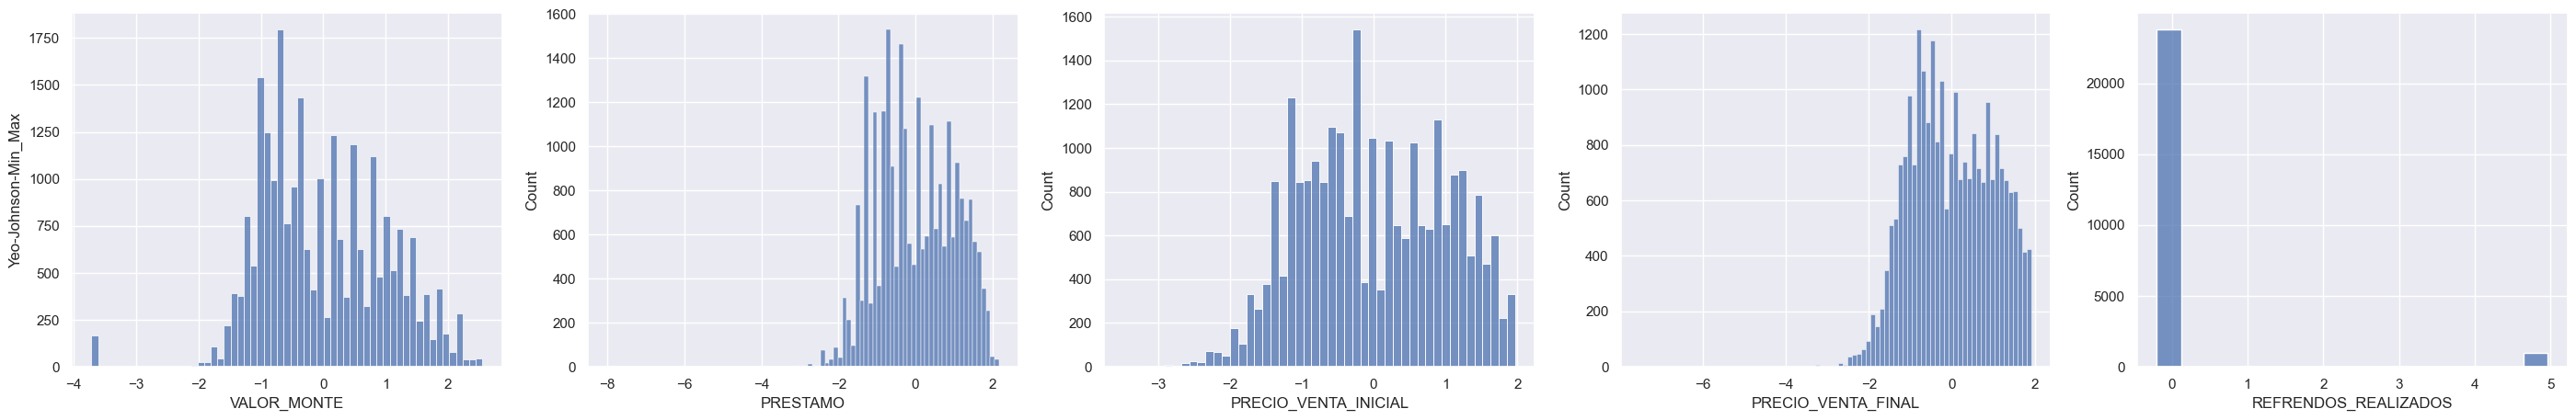

In [370]:
sns.set(rc={'figure.figsize':(35,5)})
fig, axes = plt.subplots(1,5)
for k in range(0,5):
# Datos originales
  plt.subplot(1,5, k+1)

  Transf2 = scaler_df[num_var_list[k]]
  sns.histplot(Transf2)
  plt.xlabel(num_var_list[k])
  if k == 0:
    plt.ylabel('Yeo-Johnson-Min_Max')

plt.show()

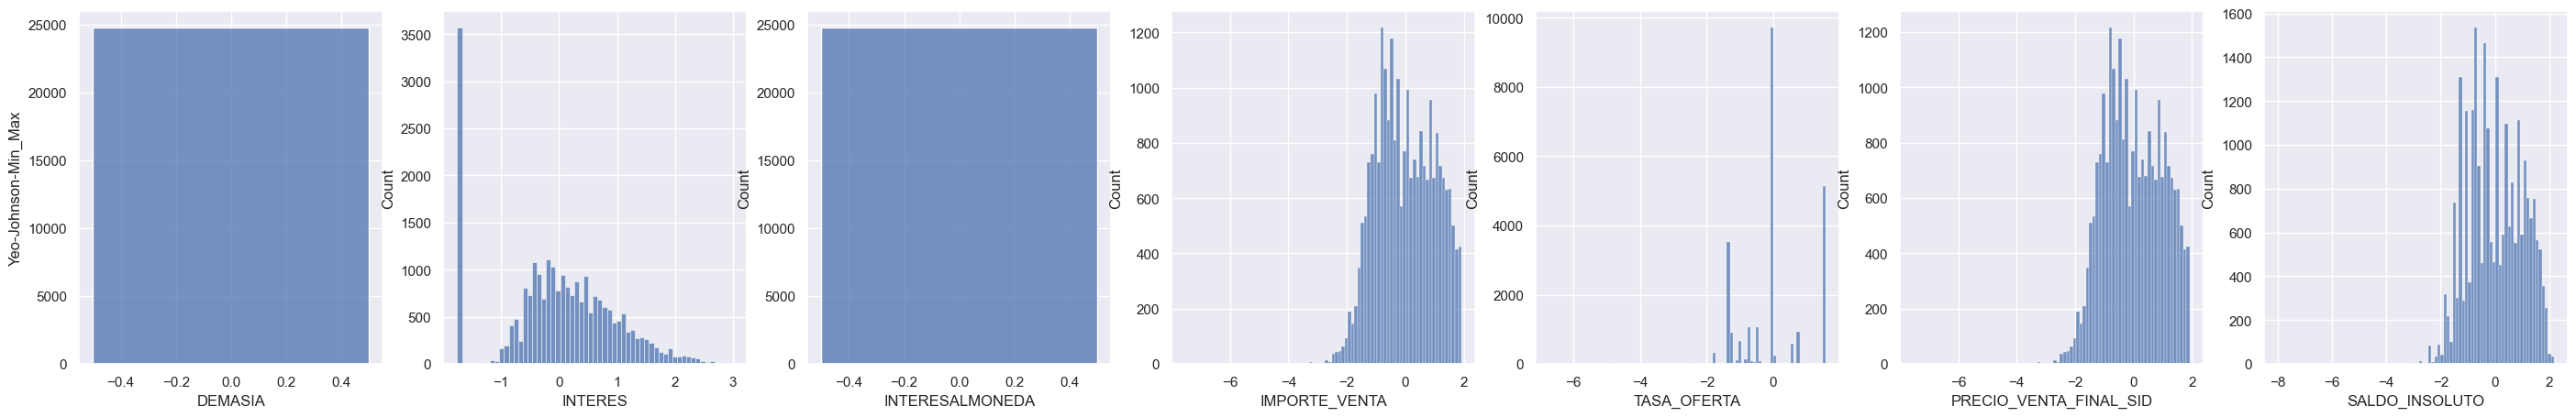

In [371]:
sns.set(rc={'figure.figsize':(35,5)})
fig, axes = plt.subplots(1,7)
for k in range(0,7):
# Datos originales
  plt.subplot(1,7, k+1)

  Transf2 = scaler_df[num_var_list_2[k]]
  sns.histplot(Transf2)
  plt.xlabel(num_var_list_2[k])
  if k == 0:
    plt.ylabel('Yeo-Johnson-Min_Max')

plt.show()

Podemos observar que las distribuciones de las variables numéricas considerando nuestra variable target, son prácticamente normales mayormente.

#**Codificación Variables Categóricas**

In [372]:
import re                                                                                        # Modulo para trabajar con expresiones regulares



#def valor_texto(val):                                                                            # Funcion que verifica si un valor es texto valido (sin numeros, fechas o vacios)
#    if pd.isna(val) or val.strip().lower() in ['nan', '']:                                       # Verifica si esta vacia es NaN
#        return False
#    if re.search(r'\d', val):                                                                    # Verifica si contiene numeros
#        return False
#    if re.search(r'[\-/:]', val):
#        return False
#    if len(val.strip()) < 2:                                                                     # Verifica si es una palabra corta
#        return False
#    return True
#
#
#columnas_cat = ['TIPO_PRENDA', 'ESTADO_SUCURSAL']                                        # Lista de columnas categoricas
#
#
#for col in columnas_cat:                                                                         # Recorre las columnas categoricas
#    df_relojes[col] = df_relojes[col].astype(str).str.strip().str.upper()                                        # Convierte a string, elimina espacios
#    df_relojes = df_relojes[df_relojes[col].apply(valor_texto)]                                                          # Filtra solo valores que sean texto valido
#
#
#valores_validos_ramo = ['ALHAJAS', 'RELOJES', 'CL', 'CUMPLIDO', 'DIAMANTES']                     # Lista de valores validos para la columna RAMO
#df_relojes = df_relojes[df_relojes['RAMO'].isin(valores_validos_ramo)]                                                   # Filtra solo los valores validos de la columna RAMO
#
#
##df = pd.get_dummies(df, columns=columnas_cat, prefix=columnas_cat, drop_first=True)              # Codificacion One-Hot de todas las columnas categoricas
#
#
#print("Columnas después de codificación:")                                                       # Imprime las columnas codificadas
#print(df_relojes.columns[df_relojes.columns.str.startswith(('RAMO_', 'TIPO_PRENDA_', 'ESTADO_SUCURSAL_'))])


**Justificación del uso de codificacion One-Hot**

La codificacion one-hot fue aplicada a las variables categoricas RAMO, TIPO_PRENDA, y ESTADO_SUCURSAL con el objetivo de transformar estos campos de texto en un formato numerico adecuado para el entrenamiento de modelos de aprendizaje automatico.

Las variables categoricas no tienen un orden logico y ordinal y son simplemente etiquetas sin jerarquia. Al utilizar una codificacion numerica directa como 0,1,2,3 el modelo podria interpretar relaciones inexistentes entre categorias.

Esto facilitara la visualizaaacion del impacto individual que cada categoria en modelos futuros.

La eleccion de One-Hot tambien responde a la naturaleza de las variables. En este caso, RAMO y TIPO_PRENDA representan tipos de productos sin ninguna jerarquia entre ellos, mientras que ESTADO_SUCURSAL denota ubicaciones geograficas, sin una relacion ordinal.

#**Transformación de variables categóricas**

Antes de iniciar con la transformación de variables categóricas, es importante separar en dos listas las variables con alta cardinalidad y las variables con baja cardinalidad. Vamos a empezar con las de baja cardinalidad

In [373]:
r = df_relojes.describe(include=object).T
moda = r['top'].dtype

In [374]:
few_cardinal = r[r['unique'] <= 100].index
few_cardinal_variables = df_relojes[few_cardinal]
few_cardinal_variables

,ESTADO_SUCURSAL,ORIGEN,SUBRAMO,PRODUCTO,TIPO_PRENDA
67,TAMAULIPAS,MIDAS,Relojes Boutique - Gama Baja,CL,reloj
72,ESTADO DE MÃXICO,MIDAS,Relojes Boutique - Gama Baja,CL,reloj
76,CIUDAD DE MÃXICO,MIDAS,Relojes Boutique - Gama Baja,CL,reloj
78,NUEVO LEÃN,MIDAS,Relojes Boutique - Gama Baja,CL,reloj
82,TAMAULIPAS,MIDAS,Relojes de Oro,CL,reloj
...,...,...,...,...,...
1047719,CHIAPAS,MIDAS,Relojes Boutique - Gama Baja,CL,reloj
1047741,CHIHUAHUA,MIDAS,Relojes Boutique - Gama Baja,CL,reloj
1048221,CIUDAD DE MÃXICO,MIDAS,Relojes Boutique - Gama Baja,CL,reloj
1048268,ZACATECAS,MIDAS,Relojes de Oro,CL,reloj


Vamos a visualizar, en gráficos de barra la frecuencia de las categorías de las variables con baja cardinalidad

C:\Users\HP\AppData\Local\Temp\ipykernel_8980\733116524.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60, ha='right', fontsize=8)
C:\Users\HP\AppData\Local\Temp\ipykernel_8980\733116524.py:22: UserWarning: Glyph 137 (\x89) missing from font(s) Arial.
  plt.tight_layout(rect=[0,0,1,0.97])
C:\Users\HP\AppData\Local\Temp\ipykernel_8980\733116524.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60, ha='right', fontsize=8)
C:\Users\HP\AppData\Local\Temp\ipykernel_8980\733116524.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60, ha='right', fontsize=8)
C:\Users\HP\AppD

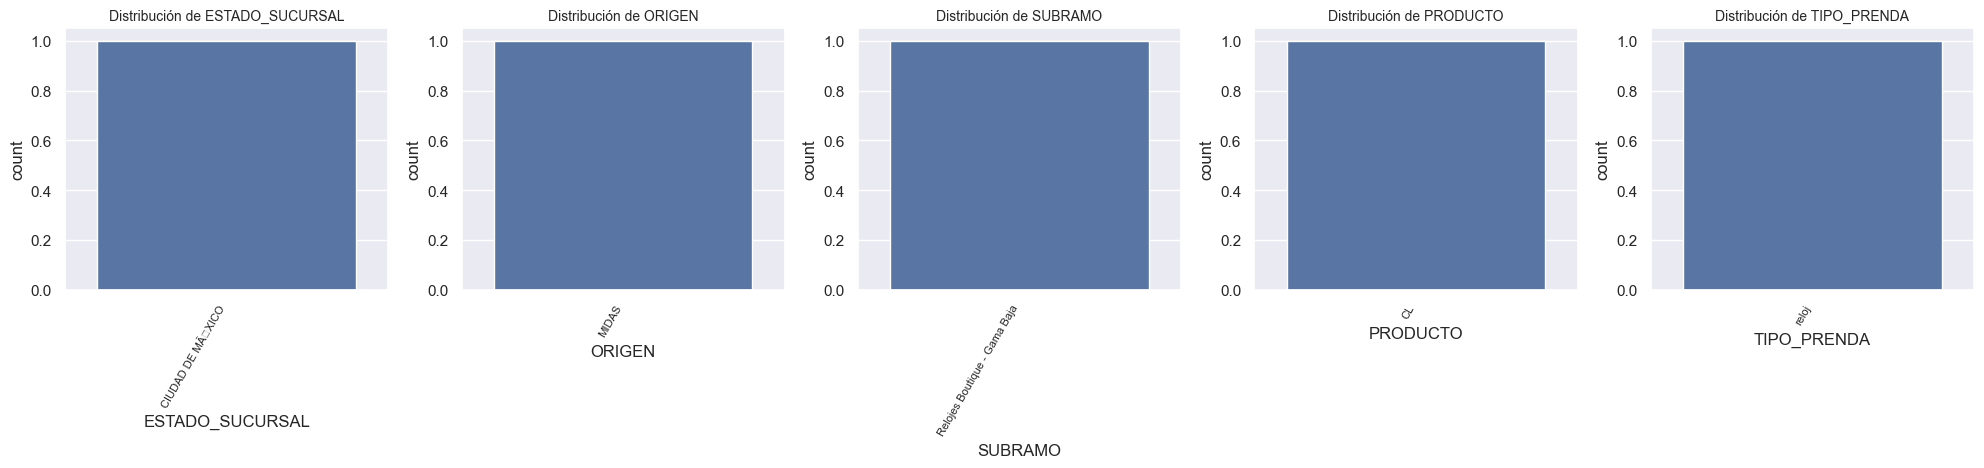

In [375]:
sample_df_2 = few_cardinal_variables.sample()

# Create subplots
fig, axis = plt.subplots(1, 5, figsize=(20, 5))

# Define the variables to plot
variables = ['ESTADO_SUCURSAL','ORIGEN',
              'SUBRAMO', 'PRODUCTO',
             'TIPO_PRENDA']


for i, var in enumerate(variables):
    ax = axis[i]


    top_categories = sample_df_2[var].value_counts().nlargest(20).index
    filtered_data = sample_df_2[sample_df_2[var].isin(top_categories)]

    plot = sns.countplot(x=var, data=filtered_data, ax=ax, order=top_categories)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=60, ha='right', fontsize=8)
    ax.set_title(f'Distribución de {var}', fontsize=10)
    plt.tight_layout(rect=[0,0,1,0.97])

plt.show()



Posteriormente vamos a aplicar la codificación *one hot a las variables de baja cardinalidad. Consideremos que esta codificación agrega más columnas al dataset por cada valor único. En nuestro caso tenemos más variables con baja cardinalidad que alta cardinalidad

In [376]:
encoder = OneHotEncoder(drop='first',sparse_output=False)
encoded_data = encoder.fit_transform(few_cardinal_variables)

In [377]:
onehot_df = pd.DataFrame(encoded_data)
onehot_df.columns = encoder.get_feature_names_out()
onehot_df

,ESTADO_SUCURSAL_BAJA CALIFORNIA NORTE,ESTADO_SUCURSAL_BAJA CALIFORNIA SUR,ESTADO_SUCURSAL_CAMPECHE,ESTADO_SUCURSAL_CHIAPAS,ESTADO_SUCURSAL_CHIHUAHUA,ESTADO_SUCURSAL_CIUDAD DE MÃXICO,ESTADO_SUCURSAL_COAHUILA,ESTADO_SUCURSAL_COLIMA,ESTADO_SUCURSAL_DURANGO,ESTADO_SUCURSAL_ESTADO DE MÃXICO,...,TIPO_PRENDA_argolla,TIPO_PRENDA_brazalete,TIPO_PRENDA_colgante,TIPO_PRENDA_esclava,TIPO_PRENDA_lote,TIPO_PRENDA_moneda,TIPO_PRENDA_otros,TIPO_PRENDA_pendiente,TIPO_PRENDA_pulsera,TIPO_PRENDA_reloj
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24739,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24740,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24741,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Posteriormente vamos a aplicar codificación binaria a las variables con alta cardinalidad, la transformación será BinaryEncoder para que el modelo se más eficiente para evaluar los datos y distribuciones de las variables

In [378]:
high_cardinal = r[r['unique'] > 100].index
highly_cardinal_variables = df_relojes[high_cardinal]
highly_cardinal_variables = highly_cardinal_variables['SUCURSAL']
highly_cardinal_variables

67          277
72           81
76         1006
78          130
82          277
           ... 
1047719     121
1047741      75
1048221    1005
1048268      44
1048520     301
Name: SUCURSAL, Length: 24744, dtype: object

In [379]:
encoder = BinaryEncoder()
encoded_data= encoder.fit_transform(highly_cardinal_variables)

In [380]:
binary_df = pd.DataFrame(encoded_data)
binary_df.columns = encoder.get_feature_names_out()
binary_df

,SUCURSAL_0,SUCURSAL_1,SUCURSAL_2,SUCURSAL_3,SUCURSAL_4,SUCURSAL_5,SUCURSAL_6,SUCURSAL_7,SUCURSAL_8
67,0,0,0,0,0,0,0,0,1
72,0,0,0,0,0,0,0,1,0
76,0,0,0,0,0,0,0,1,1
78,0,0,0,0,0,0,1,0,0
82,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1047719,0,1,0,0,0,0,1,0,1
1047741,0,1,1,1,0,0,0,0,1
1048221,0,1,1,1,1,1,0,0,1
1048268,0,1,1,0,1,1,1,1,1


#**Aplicación de PCA a variables numéricas**

La aplicación de Principal Component Analysis, considte en reducir la dimensionalidad de un dataset para mejorar la eficiencia de un modelo de machine learning como el que estaremos aplicando al problema, es importante mencionar que previo a aplicar el método de PCA, se requiere escalar las variables numércias, ya que la varianza es sensible a la magnitud de los datos, etapa que ya se realizó anteriormente. Se requiere que mayormente la media sea cero y su varianza de 1

In [381]:
pca = PCA()
scaler_df_projected = pca.fit_transform(scaler_df)
scaler_df_projected = pd.DataFrame(scaler_df_projected)
scaler_df_projected.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-3.580490,-0.426007,-0.173029,-0.945211,-0.016883,-0.086911,0.209479,-0.002057,-0.000017,-4.367036e-16,3.718879e-19,1.147470e-17
1,-1.074799,-0.335314,-0.479428,-1.555800,0.164983,0.136448,0.087934,-0.003573,-0.000049,-8.286738e-16,-2.331363e-19,6.787318e-16
2,-0.806139,-1.320636,-0.606034,-0.167438,-0.083093,-0.097331,-0.030272,-0.000352,0.000068,6.750182e-17,-1.525830e-19,-6.165102e-16
3,2.162593,0.091729,-0.317267,0.368741,-0.286989,-0.111331,0.070745,0.000457,0.000011,1.792949e-16,2.974481e-19,-8.062014e-17
4,4.163536,1.119882,-0.057503,1.012420,-0.400398,0.045991,0.108625,0.001321,-0.000058,2.546276e-16,5.502416e-19,3.978712e-16


Vamos a visualizar la curva de porcentaje de varianza acumulada y determinar el número mínimo de componentes principales que expliqu más del 90% de varianza

In [382]:
total_components =scaler_df_projected.shape[1]

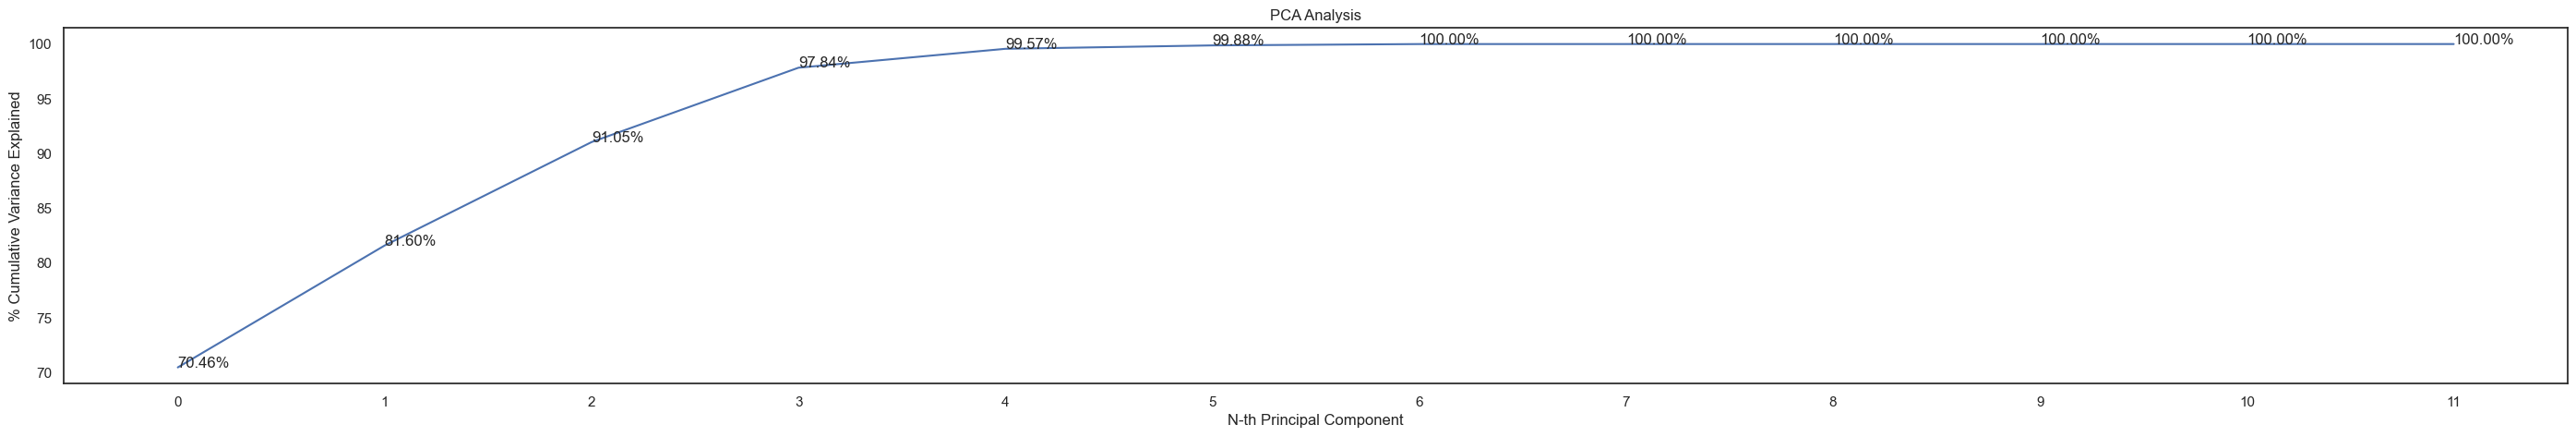

In [383]:
sns.set_style('white')

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_components,1))
#ax = plt.axes()
#ax.xaxis.grid()

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.2f'))+'%')

Podemos observar el porcentaje de varianza que se explica por cada componente principal. En nuestro caso el componente principal #6 explica más del 99% de varianza de los datos y es el que vamos a ocupar

In [384]:
for i in range(0, total_components):
  print("The percentage of variance explained by principal component", i+1, "is", format(pca.explained_variance_ratio_[i]*100,'.2f'),'%')

The percentage of variance explained by principal component 1 is 70.46 %
The percentage of variance explained by principal component 2 is 11.14 %
The percentage of variance explained by principal component 3 is 9.45 %
The percentage of variance explained by principal component 4 is 6.79 %
The percentage of variance explained by principal component 5 is 1.73 %
The percentage of variance explained by principal component 6 is 0.31 %
The percentage of variance explained by principal component 7 is 0.12 %
The percentage of variance explained by principal component 8 is 0.00 %
The percentage of variance explained by principal component 9 is 0.00 %
The percentage of variance explained by principal component 10 is 0.00 %
The percentage of variance explained by principal component 11 is 0.00 %
The percentage of variance explained by principal component 12 is 0.00 %


Importante, antes de concatenar el nuevo dataframe con las variables transformadas, escaladas y analizadas con PCA, vamos a separar la variable de salida (DIAS_ALMONEDA) sin las transformaciones y escalamiento, ya que es importante por temas de interpretabilidad conservar la variable en sus unidades originales que son días

In [385]:
percentile_25 = df_relojes["DIAS_ALMONEDA"].quantile(0.25)
percentile_75 = df_relojes["DIAS_ALMONEDA"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_relojes[(df_relojes["DIAS_ALMONEDA"] < lower_limit) | (df_relojes["DIAS_ALMONEDA"] > upper_limit)]
diasalmoneda_outliers = IQR_outliers['DIAS_ALMONEDA']

diasalmoneda_outliers_df = pd.DataFrame(diasalmoneda_outliers)
diasalmoneda_outliers_df.columns = ['diasalmoneda_outliers']
diasalmoneda_outliers_df

,diasalmoneda_outliers
67,941
72,862
76,787
78,783
82,767
...,...
1042577,386
1045044,906
1045081,676
1048268,698


In [386]:
#df_relojes.drop(diasalmoneda_outliers_df.index, inplace=True)

In [387]:
y= df_relojes['DIAS_ALMONEDA']

#**Conjuntar en un dataframe con transformaciones, escalamiento y PCA**

In [388]:
n = 6
#Vamos a seleccionar únicamente los primeros n componentes del PCA y los almacenamos en un nuevo dataframe
new_data = scaler_df_projected[[0,1,2,3,4,5]]
#Se renombran las columnas del dataframe con los nombres de los componentes principales
new_data.columns = ['PC{}'.format(i) for i in range(1,n+1)]

#Se concatena el dataframe de componentes principales, dataframe codificado one-hot, las variables binarias (categóricas) y la variable objetivo y

new_data = pd.concat([new_data.reset_index(drop=True),onehot_df.reset_index(drop=True),binary_df.reset_index(drop=True),y.reset_index(drop=True)],axis=1)


In [389]:
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,ESTADO_SUCURSAL_BAJA CALIFORNIA NORTE,ESTADO_SUCURSAL_BAJA CALIFORNIA SUR,ESTADO_SUCURSAL_CAMPECHE,ESTADO_SUCURSAL_CHIAPAS,...,SUCURSAL_0,SUCURSAL_1,SUCURSAL_2,SUCURSAL_3,SUCURSAL_4,SUCURSAL_5,SUCURSAL_6,SUCURSAL_7,SUCURSAL_8,DIAS_ALMONEDA
0,-3.580490,-0.426007,-0.173029,-0.945211,-0.016883,-0.086911,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,941
1,-1.074799,-0.335314,-0.479428,-1.555800,0.164983,0.136448,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,862
2,-0.806139,-1.320636,-0.606034,-0.167438,-0.083093,-0.097331,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,787
3,2.162593,0.091729,-0.317267,0.368741,-0.286989,-0.111331,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,783
4,4.163536,1.119882,-0.057503,1.012420,-0.400398,0.045991,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24739,2.718885,-0.949040,-0.658009,0.814054,0.065721,0.014799,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,1,0,1,18
24740,1.492979,-0.864945,-0.479973,1.050638,0.024637,0.058435,0.0,0.0,0.0,0.0,...,0,1,1,1,0,0,0,0,1,18
24741,-2.396189,-2.596239,-0.837419,-0.159696,-2.817937,0.325916,0.0,0.0,0.0,0.0,...,0,1,1,1,1,1,0,0,1,9
24742,2.392367,-1.102032,-0.723259,0.508404,-0.194073,0.080100,0.0,0.0,0.0,0.0,...,0,1,1,0,1,1,1,1,1,698


In [390]:
per_miss_col = new_data.isna().mean() * 100
missing = pd.DataFrame(per_miss_col)
missing.columns = ['Percentage of missing values (%)']
missing

,Percentage of missing values (%)
PC1,0.0
PC2,0.0
PC3,0.0
PC4,0.0
PC5,0.0
...,...
SUCURSAL_5,0.0
SUCURSAL_6,0.0
SUCURSAL_7,0.0
SUCURSAL_8,0.0


In [391]:
new_data = new_data.dropna()

In [392]:
new_data.shape

(24744, 63)

In [393]:
new_data.to_csv('C:/Maestría Inteligencia artificial aplicada/Trimestre 7 (Proyecto integrador y TD)/Semana 6/Relojes/new_df_afterPCA_relojes.csv', index=False)